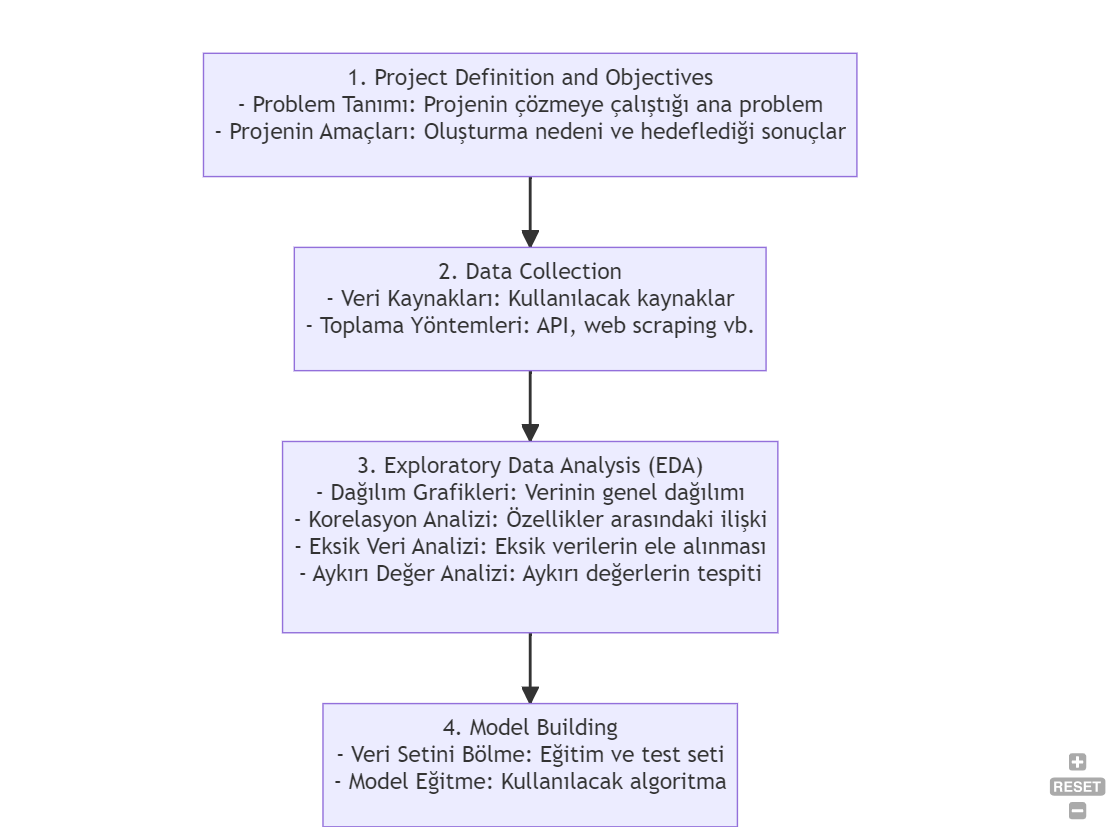

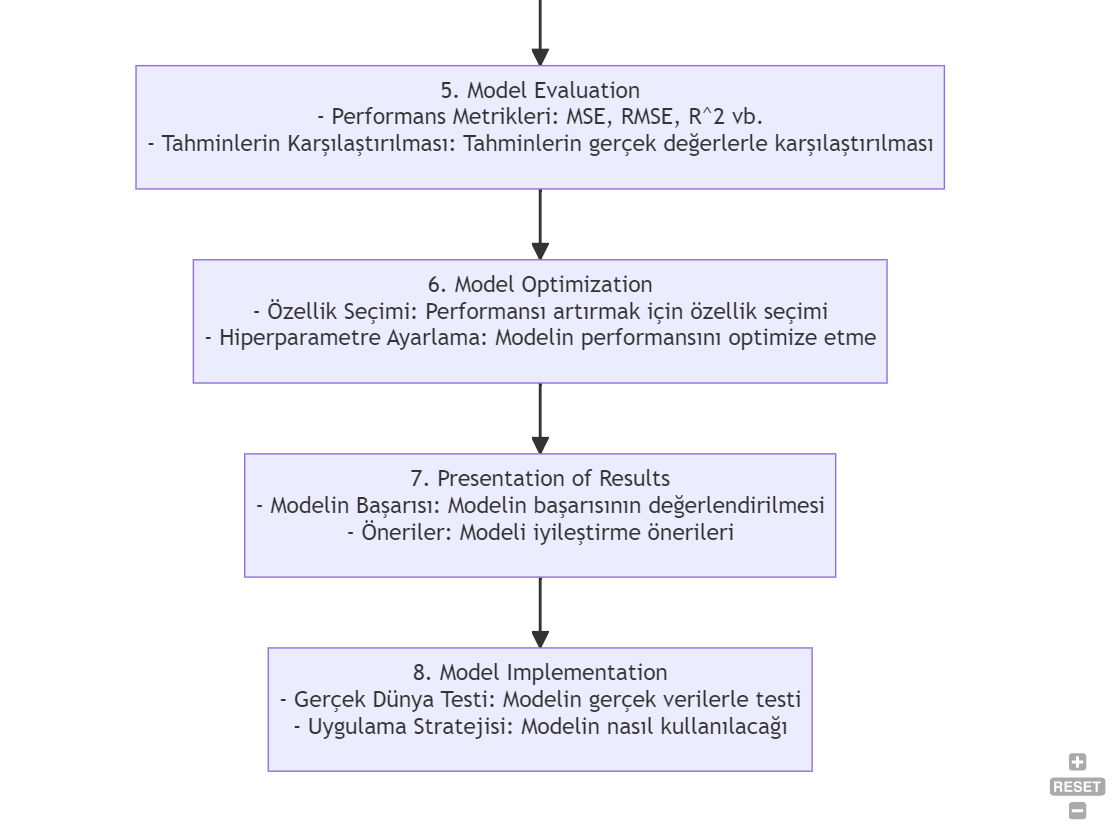
https://medium.com/p/c34dab36dc26

# About the Dataset

- **Auto Scout** data was obtained from the online car trading company [AutoScout24](https://www.autoscout24.com) in 2019 and contains various features of 9 different car models.

- In this project, we will use a dataset that has already been pre-processed and prepared for the algorithms.

- The aim of this project is to understand machine learning algorithms. Therefore, since you will be working on a processed dataset, we won’t need an extensive EDA process.

- In this scenario, we will predict car prices using regression algorithms.

- To start, we will need to import the necessary libraries. Additionally, we will need to perform some preprocessing before moving on to modeling.

- Then, we will apply Linear Regression, Ridge Regression, Lasso Regression, and Elastic-Net algorithms in sequence.

- We can measure the success of our models using regression error metrics and the cross-validation method.

- For better results, we will try to improve the success of our models by tuning hyperparameters.

- We will determine the importance of features for the model and adjust our model with the most important features to save resources.

- Finally, we will compare the performance of the algorithms.

- You can also work further on the algorithm with the highest prediction accuracy.


1. **make_model**: Contains the make and model information of the vehicles.
2. **body_type**: Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price**: Contains the price information of the vehicles.
4. **vat**: Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km**: Contains the mileage information of the vehicles.
6. **Type**: Indicates the type of the vehicle (e.g., new, used).
7. **Fuel**: Indicates the type of fuel used (e.g., petrol, diesel).
8. **Gears**: Contains the number of gears in the vehicles.
9. **Comfort_Convenience**: Contains the comfort and convenience features of the vehicles.
10. **Entertainment_Media**: Contains entertainment and media features.
11. **Extras**: Contains the extra features of the vehicles.
12. **Safety_Security**: Contains safety features.
13. **age**: The age of the vehicles.
14. **Previous_Owners**: Contains the number of previous owners of the vehicles.
15. **hp_kW**: Contains the horsepower of the vehicles in kilowatts.
16. **Inspection_new**: Contains information about whether the vehicle has a new inspection.
17. **Paint_Type**: Contains the type of paint of the vehicles.
18. **Upholstery_type**: Contains the type of upholstery in the vehicles.
19. **Gearing_Type**: Indicates the type of transmission in the vehicles.
20. **Displacement_cc**: Indicates the engine displacement in cubic centimeters (cc).
21. **Weight_kg**: Indicates the weight of the vehicles in kilograms.
22. **Drive_chain**: Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb**: Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.

# Tasks

- 1. Import Modules, Load Data and Data Review

- 2. EDA

- 3. Train | Test Split

- 4. Implement Linear Regression

- 5. Implement Ridge Regression

- 6. Implement Lasso Regression

- 7. Implement Elastic-Net

- 8. Visually Compare Models Performance In a Graph

- 9. Feature Importance

- 10. Compare Models Performance

- 11. Prediction

# Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10,6)   # default: (6.4, 4.8)
pd.set_option('display.max_columns', 500) # default:20
pd.set_option('display.max_rows', 500)    # default:10
pd.options.display.float_format = '{:.3f}'.format

# EDA

In [2]:
df0 = pd.read_csv("final_scout_not_dummy.csv")
df = df0.copy()

In [3]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [5]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns))

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
336,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
337,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
339,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
340,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
341,Audi A1,Compact,14990,Price negotiable,49351.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport seats,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1180.000,front,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15819,Renault Espace,Van,50950,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1647.000,front,7.600
15820,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15823,Renault Espace,Van,52711,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1608.000,front,7.400
15808,Renault Espace,Van,54982,VAT deductible,11.000,New,Benzine,6.000,"Air conditioning,Armrest,Automatic climate con...","Digital radio,Radio","Alloy wheels,Voice Control","ABS,Daytime running lights,Driver-side airbag,...",0.000,1.000,165.000,0,Metallic,Part/Full Leather,Automatic,1798.000,1647.000,front,7.600


In [6]:
# Checks for duplicated observations in the dataset and removes them

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [7]:
duplicate_values(df)

Duplicate check...
There are 1673 duplicated observations in the dataset.
1673 duplicates were dropped!
No more duplicate rows!


In [8]:
df.describe().T

# We are getting to know the data

# If the std is greater than or close to the mean, it suggests that there might be an outlier problem in our data overall.

# If there is a significant gap between "min" and the first 25th percentile or between the 75th percentile and max,
# it suggests that there might be outlier values in the data, even if it's not a widespread issue.


,count,mean,std,min,25%,50%,75%,max
price,14242.000,18100.969,7421.214,4950.000,12950.000,16950.000,21900.000,74600.000
km,14242.000,32582.110,36856.863,0.000,3898.000,21000.000,47000.000,317000.000
Gears,14242.000,5.940,0.703,5.000,5.000,6.000,6.000,8.000
age,14242.000,1.415,1.110,0.000,0.000,1.000,2.000,3.000
Previous_Owners,14242.000,1.041,0.337,0.000,1.000,1.000,1.000,4.000
hp_kW,14242.000,88.713,26.548,40.000,66.000,85.000,103.000,294.000
Inspection_new,14242.000,0.256,0.437,0.000,0.000,0.000,1.000,1.000
Displacement_cc,14242.000,1432.890,277.507,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,14242.000,1342.399,201.247,840.000,1165.000,1320.000,1487.000,2471.000
cons_comb,14242.000,4.825,0.862,3.000,4.100,4.800,5.400,9.100


In [9]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

## Feature Engineering

In [10]:
df.select_dtypes(include ="object").head()

,make_model,body_type,vat,Type,Fuel,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Paint_Type,Upholstery_type,Gearing_Type,Drive_chain
0,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
1,Audi A1,Sedans,Price negotiable,Used,Benzine,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",Metallic,Cloth,Automatic,front
2,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",Metallic,Cloth,Automatic,front
3,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",Metallic,Cloth,Automatic,front
4,Audi A1,Sedans,VAT deductible,Used,Diesel,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",Metallic,Cloth,Automatic,front


## Dummies control ?

In [11]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

# A 20-character space is left from the leftmost point up to the ":" symbol, and feature names are printed in this space.
# The ":" symbol is aligned in the same position across all lines.


make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [12]:
df.make_model.value_counts()

make_model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

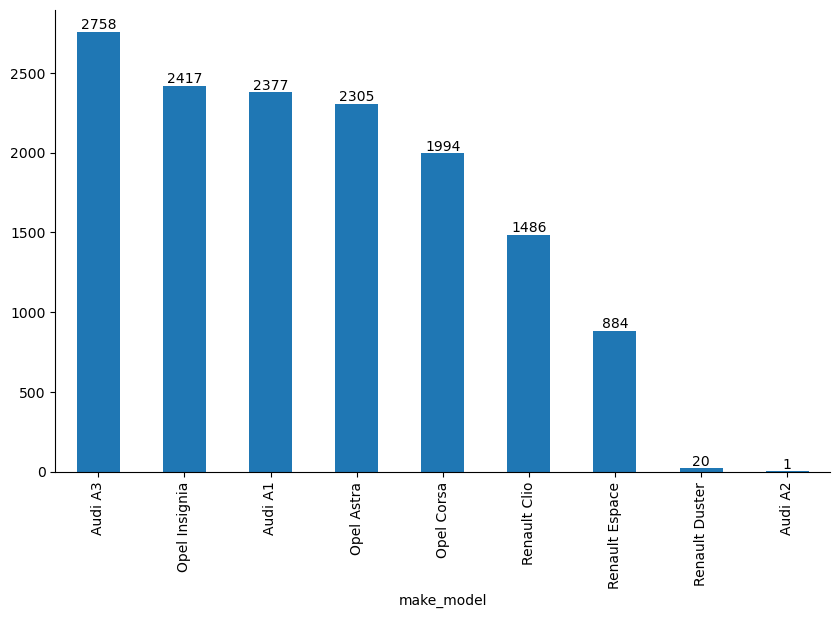

In [13]:
# This code calculates the number of unique values in the "make_model" column of our DataFrame
# and visualizes these counts in a bar graph.

ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")

ax.bar_label(ax.containers[0]);

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))


In [14]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [15]:
df.drop(index=[2614], inplace =True)

In [16]:
df.shape

(14241, 23)

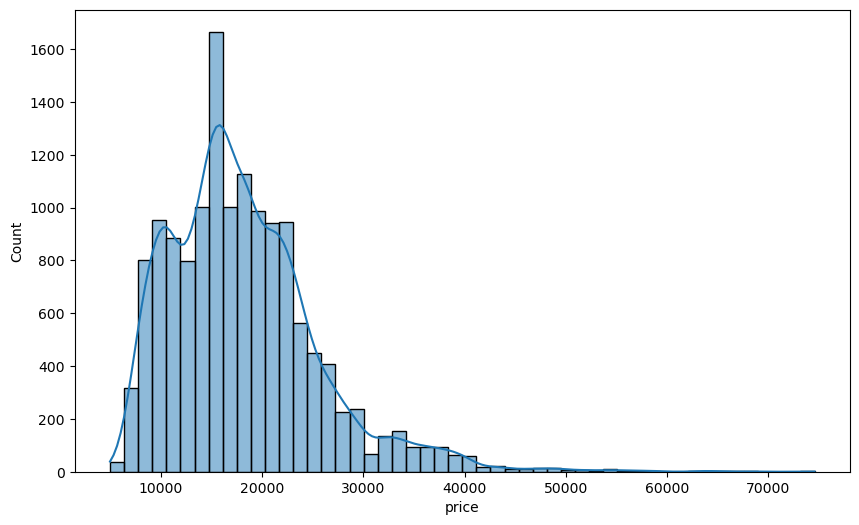

In [17]:
# Since linear models are very sensitive to outliers, I am trying to detect outliers in the data using a histplot.
# Let's not forget that in ML, an outlier means that the data belonging to one or more groups may be insufficient for training.
# Looking at the visual below, we can see that the number of cars priced over 40,000 EURO is very low.
# As a first insight from this visual, we can consider that the number of cars priced over 40,000 EURO might be insufficient for training.
# However, we cannot know if it's insufficient until we conduct the training. We should train the model both by dropping the observations
# we consider as outliers and without dropping them, then compare the scores to make a decision.

# Also, looking at the histplot for the entire dataset might mislead us about outliers. To detect outliers,
# we should group the data (e.g., Audi A3, Audi A1, Renault Clio, etc.) and then detect outliers accordingly.

sns.histplot(df.price, bins=50, kde=True);


**Linear models** are sensitive to outliers because these models try to find a line (or a plane or hyperplane in higher-dimensional spaces) that best fits the data points. Outliers can significantly affect this "best fit" goal of the model. Here are some reasons why:

1. **MSE-Based Loss Functions**: Many linear models, like linear regression, use a loss function based on Mean Squared Error (MSE). MSE amplifies large errors by squaring them, so even a single outlier can greatly increase the total error.

2. **Low Robustness**: In linear models, each data point contributes to the model's training. However, an outlier can have a much larger impact compared to all other values. This can cause the model to fit excessively to this outlier.

3. **Linear Assumption**: Linear models assume a linear relationship between the data. This can make the model particularly sensitive to outliers, as these outliers often disrupt the assumed linear relationship.

4. **Leverage Effect**: Outliers can greatly alter the slope (or gradient) of a linear model, leading to misleading predictions for all other data points.

In many applications, this sensitivity of linear models to outliers can reduce the model's generalization ability and reliability. Therefore, it is often recommended to detect and appropriately handle outliers before performing linear modeling.

Many statistical and machine learning models are sensitive to outliers. However, this sensitivity can vary depending on the characteristics of the model and the optimization techniques used.

**Models Sensitive to Outliers:**

1. **Linear Regression**: As mentioned earlier, linear regression is sensitive to outliers.
2. **Logistic Regression**: Logistic regression, a type of linear regression, can also be sensitive to outliers for similar reasons.
3. **K-Nearest Neighbors (KNN)**: The KNN algorithm can be affected by outliers, especially when the value of k is small.
4. **Univariate Time Series Models**: Models like ARIMA can be sensitive to outliers.

**Models Not Sensitive to Outliers:**

1. **Decision Tree & Random Forest**: These models typically resist outliers since they work by splitting data points.
2. **Support Vector Machines (SVM) with RBF Kernel**: SVM with an RBF kernel can be resistant to outliers.
3. **Ensemble Methods**: Methods like Boosting and Bagging combine multiple models and are generally more resistant to outliers.

**Summary**

The sensitivity of a model to outliers depends on the structural characteristics of the model and the optimization techniques it employs. Linear models are generally sensitive to outliers because these models seek linear relationships among data points, and loss functions like MSE amplify large errors. Some models (e.g., decision trees, robust regression) are more resistant to outliers and are less affected by such data. Therefore, when choosing a model, it is important to consider the characteristics of the dataset and the presence of outliers.


In [18]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

# select_dtypes(exclude ="number") filtering out the features with obj dtype from the df.

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100
...,...,...,...,...,...,...,...,...,...,...
15907,39980,100.000,6.000,0.000,1.000,118.000,0,1598.000,1734.000,4.700
15908,39950,1647.363,6.000,0.000,1.000,147.000,0,1997.000,1758.000,5.300
15909,39950,1000.000,6.000,0.000,1.000,165.000,0,1798.000,1734.000,6.800
15911,39885,9900.000,7.000,0.000,1.000,165.000,0,1798.000,1708.000,7.400


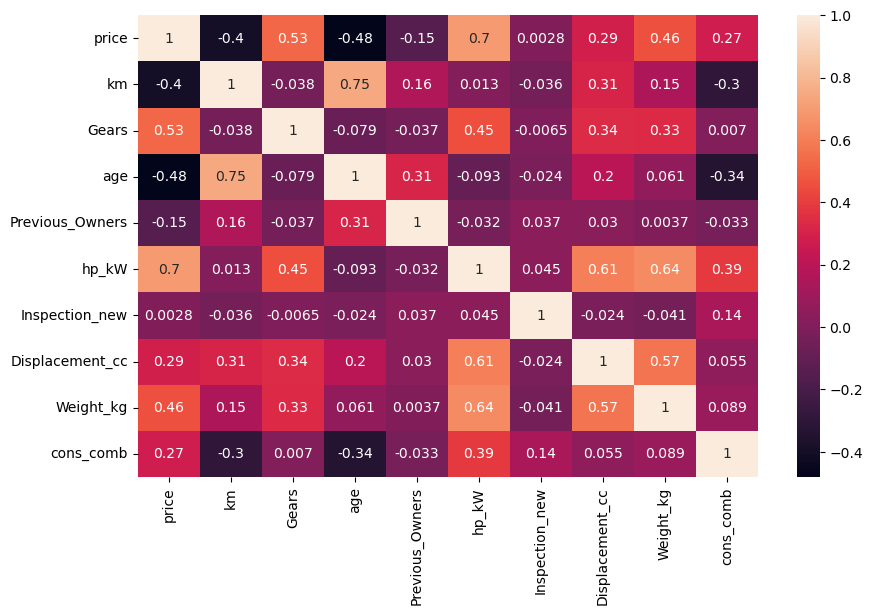

In [19]:
sns.heatmap(df_numeric.corr(), annot =True);

## Multicollinearity control

- The multicollinearity issue arises as a problem in gradient descent-based models like linear and logistic regression.

- Multicollinearity occurs when there is a high correlation between independent variables. This situation can reduce the importance of other independent variables in the model when one independent variable is strongly related to others.

- The multicollinearity problem can make it difficult to correctly interpret the model. It is challenging to accurately estimate model coefficients, which can lead to the incorrect interpretation of the effects of certain variables. Therefore, to obtain correct results, the multicollinearity problem should be eliminated.

- Regularization algorithms not only address the overfitting problem but also resolve the multicollinearity issue.

Multicollinearity describes a situation where there is a high degree of linear relationship between independent variables. While multicollinearity can be problematic for some statistical models, it may not be as critical for others.

**Models Sensitive to Multicollinearity:**

1. **Linear Regression**: The linear regression model can be significantly affected when there is high correlation (multicollinearity) between independent variables. This can cause the estimates of regression coefficients to be unstable and the results to be misleading, as the model struggles to separate the effects of independent variables.

2. **Logistic Regression**: Logistic regression, similarly, can be affected by multicollinearity because it is also a type of linear model, and high correlation between independent variables can reduce the reliability of parameter estimates.

3. **Ridge and Lasso Regression**: Ridge and Lasso regressions are regularization techniques that provide robustness against multicollinearity. However, the effectiveness of these techniques depends on the correct choice of the lambda (regularization parameter) value. The choice of lambda has a significant impact on the model’s performance and is typically selected through cross-validation.

**Models Not Sensitive to Multicollinearity:**

1. **Decision Trees**: Decision trees and models based on decision trees (e.g., Random Forest) are not affected by the relationships between independent variables because these models work based on splitting criteria and evaluate each independent variable separately.

2. **Support Vector Machines (SVM)**: SVM, especially when the correct kernel function is chosen, is not affected by high correlation between independent variables. The model has the ability to separate data points with an optimal hyperplane, and in this process, the correlation between variables does not pose a significant issue.

3. **Naive Bayes**: The Naive Bayes classifier does not rely on relationships between variables and operates under the assumption of independence, so it is not affected by multicollinearity.

**Why is Multicollinearity a Problem?**

- **Interpretability of Coefficients**: In the presence of multicollinearity, the high correlation between independent variables makes it difficult to accurately interpret the effect of these variables on the model.

- **Instability of Predictions**: Small changes in the data can cause large fluctuations in model coefficients, reducing the reliability of the model’s predictions.

- **Unreliability of Test Statistics**: Multicollinearity can lead to misleading results in statistical tests, such as unreliable p-values and R-squared values.

- To address multicollinearity, methods such as variable selection, regularization techniques, or principal components regression can be used.

- These methods can help reduce the adverse effects of multicollinearity by increasing the reliability of model predictions and improving the interpretability of coefficients.

In [20]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

# checking the corr valuees between +0.9 and +1 with this code for multicollinearity.

False

In [21]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

# checking the corr valuees between -0.9 and -1 with this code for multicollinearity.

False

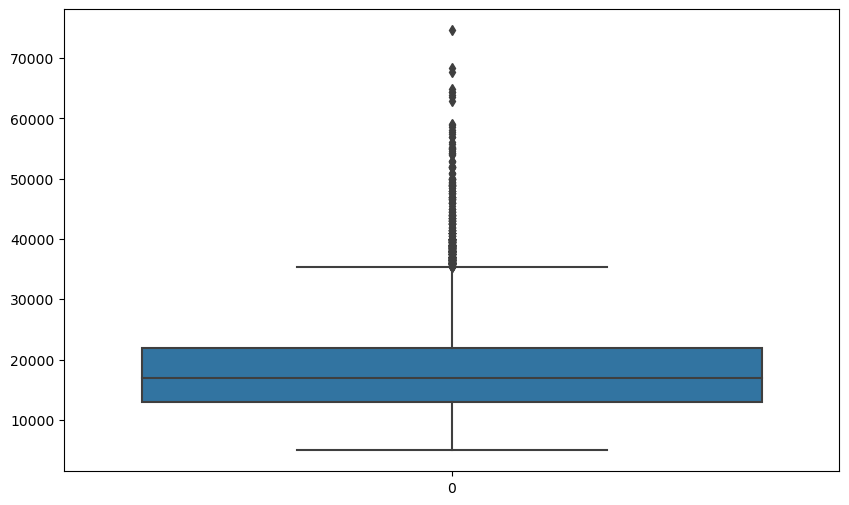

In [22]:
sns.boxplot(df.price);

# We can also gain insights about outliers through the boxplot. However, these insights might be misleading.
# Therefore, we will make our assessment not for the data as a whole,
# but based on the groups within the data (e.g., Audi A1, Audi A3, Renault Clio, etc.).


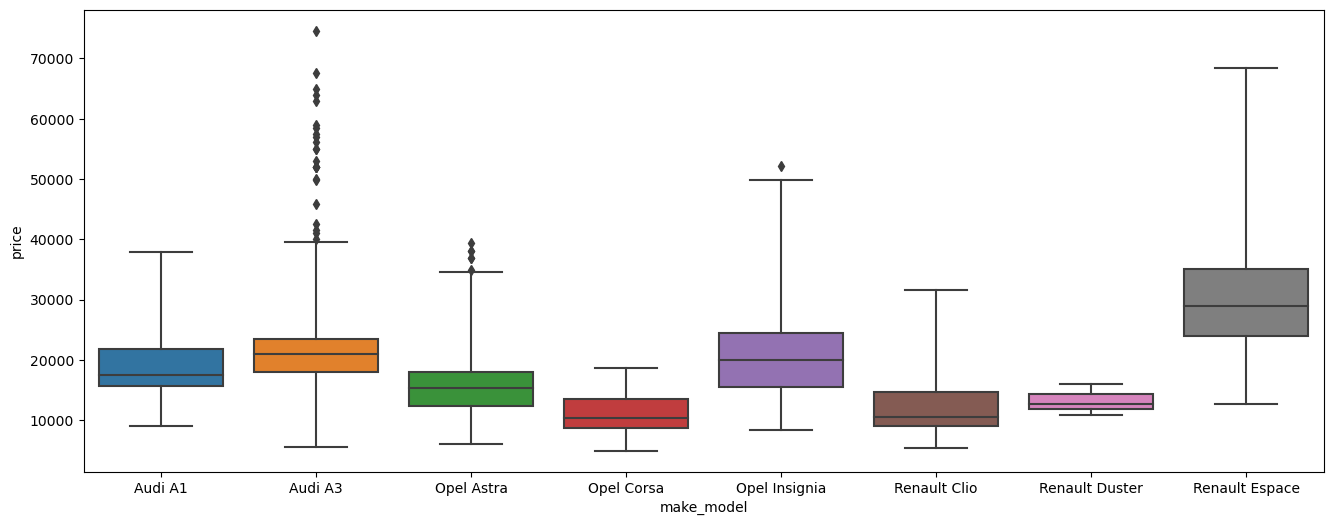

In [23]:
plt.figure(figsize=(16,6))
sns.boxplot(x="make_model", y="price", data=df, whis=3)
plt.show()

# Looking at the visuals below, we can see potential outlier observations for Audi A3, Opel Astra, Opel Insignia, 
# and Renault Clio based on 3 whiskers in the boxplot. In your own data, you can determine separate whisker values 
# for each group according to these visuals.

# To calculate IQR, the following steps are followed:

# The data is sorted from smallest to largest.
# The first and third quartiles, representing 25% and 75% of the data, are calculated.
# The IQR is obtained by subtracting the first quartile from the third quartile.

# Q1 = df.groupby('make_model')['price'].quantile(0.25)
# Q3 = df.groupby('make_model')['price'].quantile(0.75)
# IQR = Q3-Q1
# lower_lim = Q1-1.5*IQR
# upper_lim = Q3+1.5*IQR


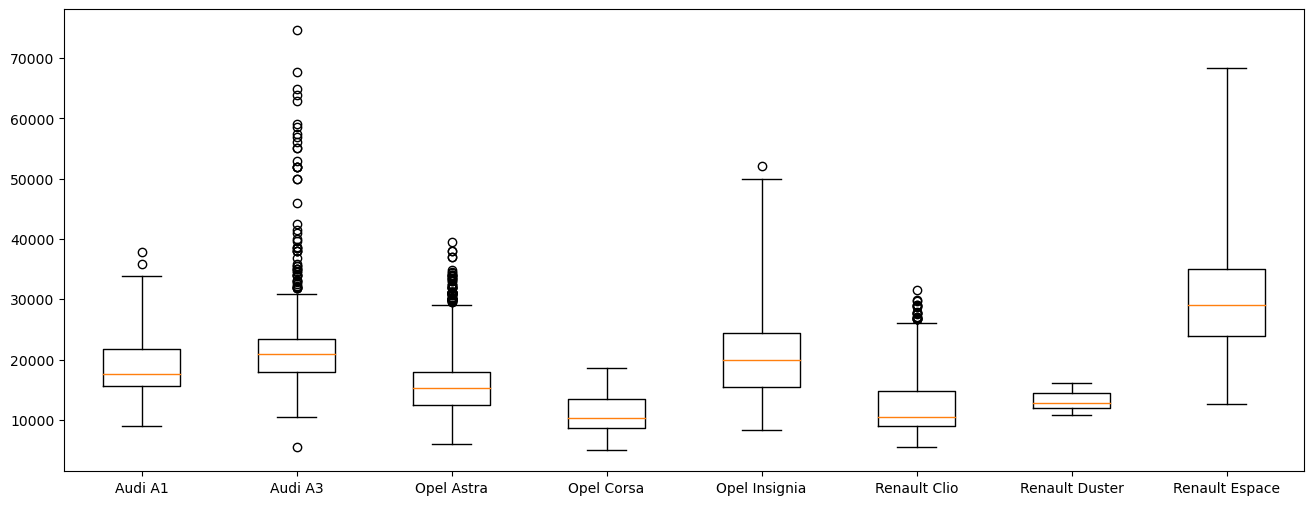

In [24]:
# Seaborn's boxplot function uses the same 'whis' value for all categories, so
# we will use matplotlib's boxplot function to plot each category separately.

whisker_values = {
    'Audi A1': 2.0,
    'Audi A3': 1.5,
    'Opel Astra': 2.0,
    'Opel Corsa': 2.5,
    'Opel Insignia': 3.0,
    'Renault Clio': 2.0,
    'Renault Duster': 1.5,
    'Renault Espace': 3.0
}

plt.figure(figsize=(16,6))

for i, make_model in enumerate(whisker_values.keys()):
    model_data = df[df['make_model'] == make_model]['price']
    plt.boxplot(model_data, positions=[i], whis=whisker_values[make_model], widths=0.5)
    
plt.xticks(range(len(whisker_values)), whisker_values.keys())
plt.show()


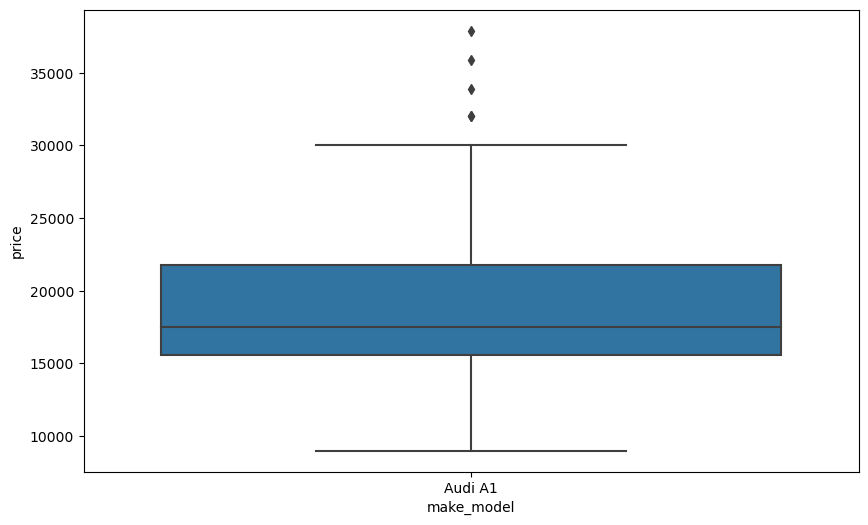

In [25]:
sns.boxplot(x="make_model", y="price", data=df[df["make_model"]== "Audi A1"], whis=1.5)
plt.show()

In [26]:
df[df["make_model"]== "Audi A1"]["price"]

# Prices of Audi A1 cars. We will use this code to try to detect outlier values for each car.


0       15770
1       14500
2       14640
3       14500
4       16790
        ...  
2609    21800
2610    21789
2611    21750
2612    21760
2613    21750
Name: price, Length: 2377, dtype: int64

In [27]:
# According to the 1.5 whisker value, we are identifying the observations that we consider could be outliers for each group.

total_outliers = []

for model in df.make_model.unique():
    
    car_prices = df[df["make_model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outliers for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()    
print("Total outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))


 The count of outliers for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outliers for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outliers for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outliers for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outliers for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outliers for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outliers for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outliers for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total outliers :  354 The rate of total outliers : 0.025


## Get dummies 

The **`get_dummies()`** method converts categorical columns into new columns through binary encoding.

Each category is encoded as a feature, where the feature is coded as 1 if present, and 0 if absent.


In [28]:
# This code parses the comma-separated text in each cell of our columns,
# and creates a new DataFrame where each item of this text is represented as a separate column


df = df.join(df["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [29]:
df.drop(["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], axis=1, inplace=True)

In [30]:
df = pd.get_dummies(df, drop_first=True)

# The drop_first=True parameter removes the column for the first category of each feature.
# This is done to prevent overfitting and multicollinearity.

# For example, if the "Fuel_Type" column has three categories: "Diesel," "Gasoline," and "LPG," 
# only two columns (e.g., "Gasoline" and "LPG") are encoded, and the "Diesel" category is used as a reference.
# This way, the "Gasoline" and "LPG" columns are related to the "Diesel" column, helping to prevent any multicollinearity issues.
# Due to differences in Pandas versions, True/False might be displayed as 0/1.


In [31]:
# Convert the Boolean values to integer.

bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [32]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [33]:
df.shape

(14241, 133)

In [34]:
df.isnull().any().any()

False

In [35]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
corr_by_price

# We are examining the correlations of all features in our data with the target.
# We sort the correlations with our target, which is "price," from smallest to largest.
# Since we don't want to see the correlation of the target with itself, we use slicing ([:-1]) 
# to ignore the target by excluding it with -1.


age                                        -0.481
Gearing_Type_Manual                        -0.424
km                                         -0.402
make_model_Opel Corsa                      -0.384
Type_Used                                  -0.368
make_model_Renault Clio                    -0.281
Drive_chain_front                          -0.159
Previous_Owners                            -0.149
make_model_Opel Astra                      -0.130
em_CD player                               -0.107
ss_Central door lock with remote control   -0.084
em_On-board computer                       -0.067
body_type_Sedans                           -0.058
ss_Fog lights                              -0.054
ss_Power steering                          -0.053
ss_ABS                                     -0.048
ss_Central door lock                       -0.045
ss_Isofix                                  -0.045
ss_Head airbag                             -0.044
em_MP3                                     -0.044


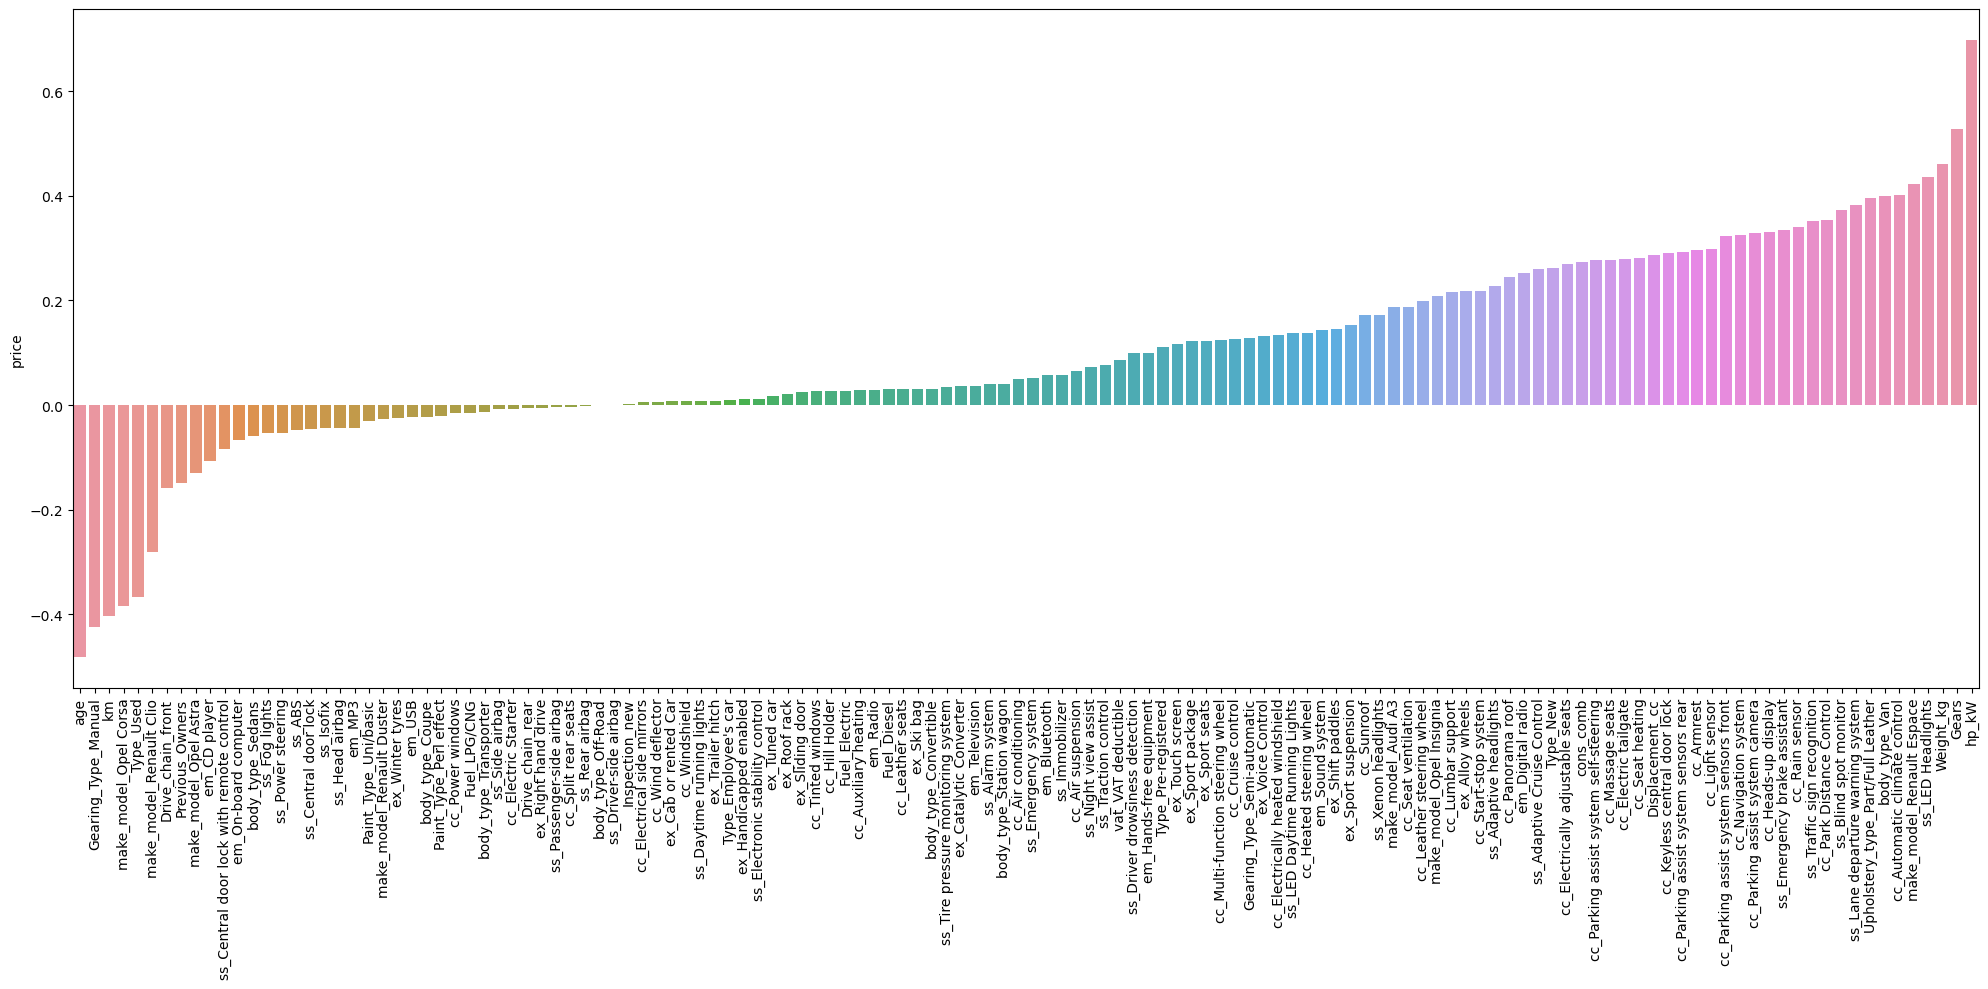

In [36]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# visualize the correlation between target variable and other features.

# Train | Test Split

**random_state=42**

**test size = 0.2**

**Data Preparation and Model Training**

1. **Organizing the Dataset**:
   - Before starting to train the model, the dataset needs to be organized. This can include steps like data cleaning, feature engineering, and handling outliers.

2. **Splitting into Training and Test Sets**:
   - The dataset is typically divided into training and test sets. The training set is used for the model to learn, while the test set is used to evaluate the model's performance.

3. **Separating the Target Variable**:
   - The target variable (label) you are trying to predict should be separated from the features. The model will attempt to predict this target variable.

**Performance Evaluation**

1. **Performance Metrics**:
   - Various performance metrics can be used for regression models, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared score.

2. **Defining a Function**:
   - By defining a function that calculates different performance metrics for the model, you can easily evaluate and compare these metrics.

3. **Using Cross Validation**:
   - Cross-validation is used to evaluate the model’s performance on different data samples. The model is trained on different subsets of the training set, and the performance of each subset is evaluated. The average of these scores gives the overall performance of the model.

**Summary**

The process of data preparation, splitting into training and test sets, identifying the target variable, and training the model are fundamental steps in machine learning projects. Various metrics and the cross-validation method are used to evaluate the model's performance. These approaches help you more accurately assess the model's generalization ability.


In [37]:
df.head()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [38]:
X= df.drop(columns="price")
y= df.price

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# We split the data into training and test sets using the train_test_split function to train the model 
# and then make predictions.
# By default, test_size is set to 0.25.
# As a best practice, values around 0.2, 0.25, or 0.3 are preferred. The goal here is to provide as much data 
# as possible to the training set. In the case of small datasets, this ratio can be chosen around 0.1 or 0.15.

# With random_state, we randomly distribute the data into training and test sets, 
# ensuring that the same data is sent to the training and test sets each time.


In [40]:
X_train.shape

(11392, 132)

In [41]:
X_test.shape

(2849, 132)

# Implement Linear Regression

**Linear Regression**

Predicts the dependent variable based on independent variables.

If there is a single independent variable, it is called simple linear regression; if there are multiple independent variables, it is called multiple linear regression.

In simple linear regression, if there is a significant relationship between the feature and the target, then the data is suitable for linear regression.

**Basic Assumptions of Linear Regression Analysis**

1. **Assumption of a Linear Relationship:** It is assumed that the relationship between the dependent variable and the independent variables can be expressed linearly. In other words, the relationship between the regression line and the variables should be linear. For example, as X increases, Y should also increase or decrease.

2. **Independence Assumption:** It is assumed that the observations are independent of each other. That is, the outcome of one observation should not affect other observations.

3. **Normal Distribution Assumption:** The error terms (residuals) should be normally distributed and should not form any pattern. This is necessary for the reliability of the regression model's predictions.

4. **Independence of Independent Variables:** There should be no multicollinearity problem between independent variables. That is, the independent variables should not be too close to each other and highly correlated.

- Ŷ = b0 + b1X

- Ŷ = predicted value

- b0 = intercept (the point where the line intersects the y-axis)

- b1 = slope = coefficient = weight

- X = independent variable

- Residual = Random error = e = Y - Ŷ

**The important thing is to minimize the error.**

**Best fit line**; is drawn in a way that minimizes our errors. When there is a single feature, it is found using the **Ordinary Least Squares** method, and when there are multiple features, it is found using **gradient descent**.

**Cost - loss function**; calculates the average error by taking the square of the difference between the actual values and the predicted values.

With the **Gradient descent** optimization algorithm, the goal is to gradually change the values of w and b to reduce the cost - loss function and try to bring it to its minimum value.

It is an iterative algorithm that aims to minimize the error.

**Bias** is the systematic error in a model's predictions. The higher the bias, the further the model's predictions are from the actual values. High bias can occur because the model is too simple and fails to capture the complexity of the data. This results in underfitting.

**Variance** refers to how much the model's predictions vary over different data points.
When trained multiple times on the same dataset, different results are obtained.
High variance indicates that the model has overfitted the data and that the patterns it has learned cannot be generalized to new data outside the dataset.

**Bias-Variance Trade-off**:
It is important to strike a balance between bias and variance. Ideally, a model should have both low bias and low variance. This means that the model can accurately capture the complexity of the data and generalize well.

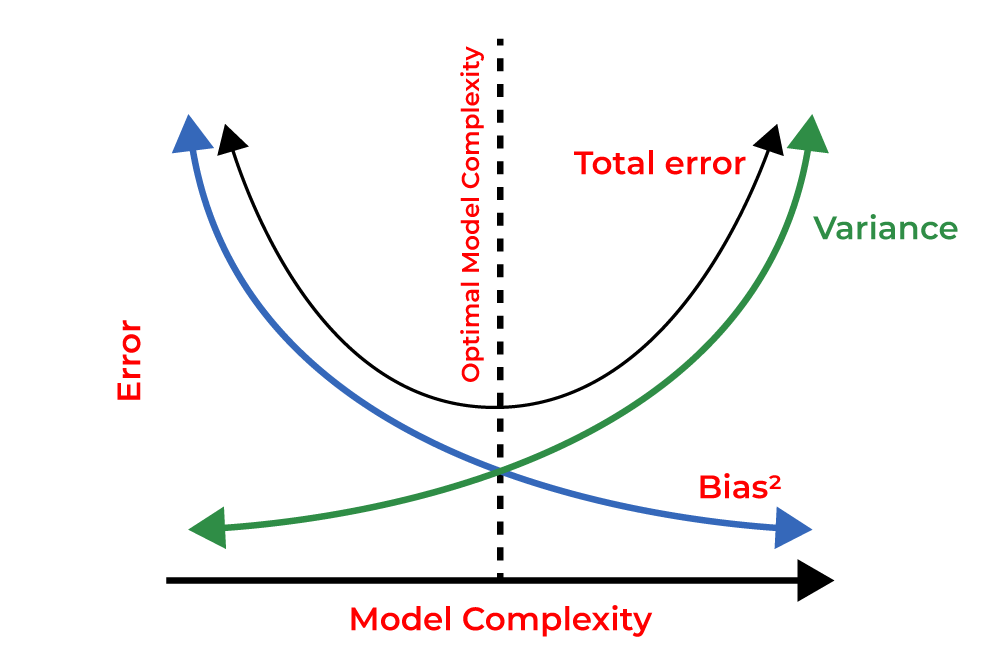

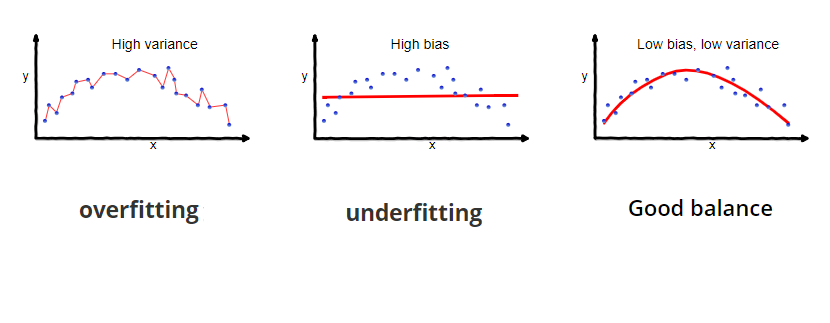

## Model

In [42]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {
    "train": {
    "R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {
    "R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
               }
    
    return pd.DataFrame(scores)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lm = LinearRegression()  # Object initialization

# We always assign our algorithm to a variable. Otherwise, we will get an error when making predictions.


In [45]:
lm.fit(X_train, y_train)  # Train the model using Linear Regression with the provided data

# If we write LinearRegression() instead of lm here, the code will still work. However, if you use LinearRegression()
# during the prediction, you will encounter an error. To avoid this error, we always make sure to assign the model to `lm`.


LinearRegression()

In [46]:
train_val(lm, X_train, y_train, X_test, y_test)

# First, we get the metrics from the test set.
# Then we compare these metrics with the ones from the training set to see how the model performs on data it has never seen
# versus the data it was trained on. If the scores are similar, it indicates that the model is able to generalize.
# However, if there is a significant difference between the scores, it means the model is not generalizing well.


,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


## Adjusted R2 Score

**R-squared (R²) The Coefficient of Determination** answers questions like how much of the variation in the target can be explained by the current features, or how much of the information needed to accurately predict the target is available.

It ranges from 0 to 1, with values closer to 1 indicating a higher level of success.

A negative R² score indicates that the model is misleading the data rather than explaining it, signaling poor model performance. In this case, the data might need to be modeled again using a different model or different feature set.

**R-squared** = 1 - (SSR / SST)

**SSR (Residual Sum of Squares)**:
SSR is the sum of the squared differences between the actual values and the predicted values. It represents the total squared error between each observation’s actual value and the model’s prediction.

**SST (Total Sum of Squares)**:
SST is the sum of the squared differences between the actual values and the mean of the actual values. It reflects the total variability in the data.

- SSR indicates how much your model "errs." A low SSR value means your model's predictions are close to the actual values.

- SST represents the total variability in your data. This can be thought of as the "maximum variability" that your model needs to predict.

**R² Score (R-squared)** is a metric that measures how well a regression model performs. However, it can sometimes be misleading, so **Adjusted R²** may need to be considered. Here’s why:

**Limitations of R² Score**

1. **Model Complexity**: The R² score tends to increase with each additional feature added to the model. This means that as you add more features, the R² value generally rises, which can create the illusion that the model is performing better than it actually is.

2. **Feature Count**: R² does not account for the number of features in the model. This means that models with many features might have overfitted the data rather than capturing the true relationship (overfitting).

**Advantages of Adjusted R²**

1. **Considers Feature Count**: Adjusted R² attempts to balance the effect of adding more features by considering the number of features in the model. It only increases if the new features genuinely improve the model's performance.

2. **More Reliable Model Evaluation**: Adjusted R² provides a more accurate assessment of model performance, especially for models with multiple features.

**Summary**

The R² score can be misleading as it may increase with the addition of new features. Adjusted R² reduces this bias by accounting for the number of features in the model, offering a more reliable measure of performance, particularly for models with multiple features. Therefore, checking Adjusted R² is important to get a clearer understanding of the model's true performance.

In [47]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)       # Calculates the R² value of the model
    n = df.shape[0]                     # Gets the number of observations (samples) in the dataset
    p = df.shape[1]-1                   # Gets the number of independent variables (features)
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)   # Calculates the Adjusted R² value using the formula
    return adj_r2


In [48]:
y_pred = lm.predict(X_test)

# We obtain the predictions (y_pred) from the model to use in the function defined above.


In [49]:
adj_r2(y_test, y_pred, df)

# We obtain our score by providing the required parameters to the function.


0.8828492602064296

## Cross Validate

**Overfitting Control and Cross Validation**

1. **Overfitting Control**: 
   - Overfitting occurs when a machine learning model fits the training data too closely and performs poorly on new, unseen data.
   - Overfitting control is done by comparing scores on the training and validation sets. If the scores on the training set are significantly higher than those on the validation set, it may be an indication of overfitting.

2. **Model Reset Before Each Cross Validation**:
   - The model should be reset before each cross-validation iteration. Otherwise, information from previous iterations might leak into the new iteration (data leakage), leading to misleading results.

3. **Using return_train_score=True**:
   - In cross-validation, setting return_train_score=True returns scores for the training set for each iteration. This is useful for understanding overfitting by comparing training and validation scores.

**Negative Scoring Metrics**

- **Metrics to Maximize**: Scikit-learn algorithms are designed to maximize scores. However, metrics like MAE (Mean Absolute Error), MSE (Mean Squared Error), and RMSE (Root Mean Squared Error) are metrics that should actually be minimized.

- **Negative Scoring**: Scikit-learn aligns with the algorithm’s tendency to maximize by shifting these metrics to the negative scale. This should be considered when evaluating MAE, MSE, and RMSE.

**cross_validate and cross_val_score Functions**

- **cross_val_score**: Returns a score for a single metric.
- **cross_validate**: Can return scores for multiple metrics and therefore offers more flexibility and broader usage options.

In summary, the use of cross-validation and scoring metrics is crucial for assessing a model's generalization capability and detecting overfitting. These techniques help to better understand a model’s performance on real-world data.

In [50]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
             cv =10, return_train_score=True)

In [51]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.065,0.012,0.891,0.890,-1719.520,-1726.579,-5955906.000,-6117627.014,-2440.472,-2473.384
1,0.061,0.008,0.880,0.891,-1809.082,-1704.708,-7372596.768,-5977292.841,-2715.253,-2444.850
2,0.062,0.008,0.903,0.888,-1675.348,-1720.954,-5852367.067,-6129630.619,-2419.167,-2475.809
3,0.060,0.008,0.882,0.890,-1676.788,-1734.738,-5171070.062,-6204713.938,-2273.999,-2490.926
4,0.057,0.011,0.878,0.891,-1824.524,-1712.041,-6594274.312,-6044960.879,-2567.932,-2458.650
5,0.068,0.012,0.887,0.890,-1728.856,-1716.903,-5977848.111,-6116207.179,-2444.964,-2473.097
6,0.061,0.010,0.878,0.891,-1754.029,-1712.446,-6882980.534,-6014497.082,-2623.544,-2452.447
7,0.054,0.017,0.886,0.890,-1764.317,-1714.978,-6244001.052,-6083169.222,-2498.800,-2466.408
8,0.055,0.009,0.876,0.891,-1823.994,-1706.043,-7228938.810,-5972788.307,-2688.669,-2443.929
9,0.058,0.019,0.893,0.889,-1678.446,-1723.104,-6021675.578,-6108254.926,-2453.910,-2471.488


In [52]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# We see that the scores for the training and validation sets are close to each other. There is no overfitting.


test_r2                                    0.885
train_r2                                   0.890
test_neg_mean_absolute_error           -1745.491
train_neg_mean_absolute_error          -1717.249
test_neg_mean_squared_error         -6330165.829
train_neg_mean_squared_error        -6076914.201
test_neg_root_mean_squared_error       -2512.671
train_neg_root_mean_squared_error      -2465.099
dtype: float64

In [53]:
train_val(lm, X_train, y_train, X_test, y_test)

# The train and test set scores from the train_val function give us insight into whether there is overfitting in our data.

# However, whether there is actual overfitting is determined by comparing the train and validation scores obtained from cross-validation (CV).

# Additionally, we verify whether the test scores we provide to the client are consistent by comparing them with the validation scores obtained from CV. If the scores are close to each other, they are considered consistent; otherwise, they are considered inconsistent.


,train,test
R2,0.890,0.884
mae,1718.455,1725.509
mse,6088991.592,6259304.583
rmse,2467.588,2501.860


In [54]:
2501/df.price.mean()

# Since we're looking at errors relative to the means, we'll divide the average of the errors (error metrics) by the average of the target values we want to predict.

# The ratio of these two average values will indicate how much error we are making.
# According to the RMSE score from the test set (hold-out set) we provide to the client, our model makes an average error of about 13.9%.


0.13817480842212715

## Prediction Error

In [55]:
# sklearn.__version__
# pip install scikit-learn==1.2.1 --user

from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

# A library that has become increasingly popular for ML visualizations recently.
# We can examine the distribution of residuals for both the train and test sets.


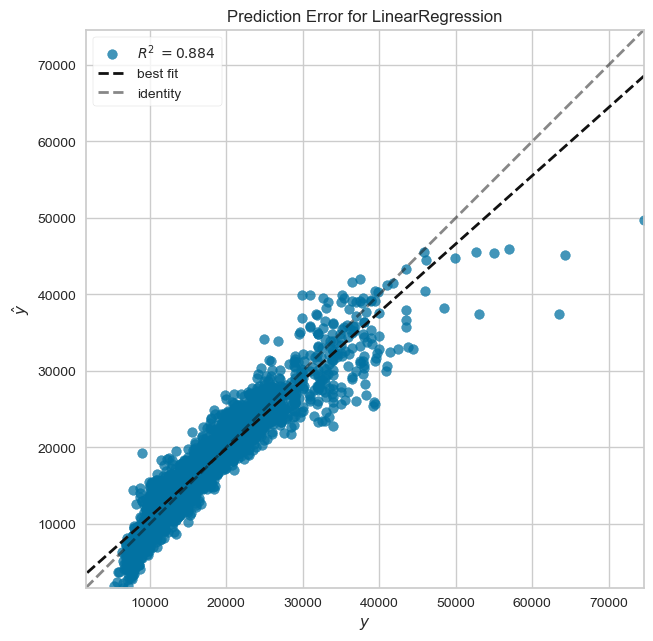

In [56]:
# We will examine how our errors are distributed.
# We will reset our model.
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# With the prediction error visual, we can see how good our model's predictions are.
# We train with the training data.
# We obtain scores with the test data and plot the graphs.

# On the y-axis, we have our predictions, and on the x-axis, we have the actual values.
# The faint (gray) identity line represents points where the model's predictions are perfect,
# while the dark line represents the best fit line drawn by our model after training.
# The closer the dark line is to the faint line, the better the model's predictions.
# The identity line has an average difference between the actual and predicted y values equal to zero,
# which means residuals are zero and the R2 value is 1.

# From the visual, we can see that cars priced at 40,000 EURO and above are pulling our best fit line down.
# If I remove these cars or outlier-priced cars detected on a model basis from the data,
# and retrain the model on this data, could I obtain better scores?


## Residual Plot

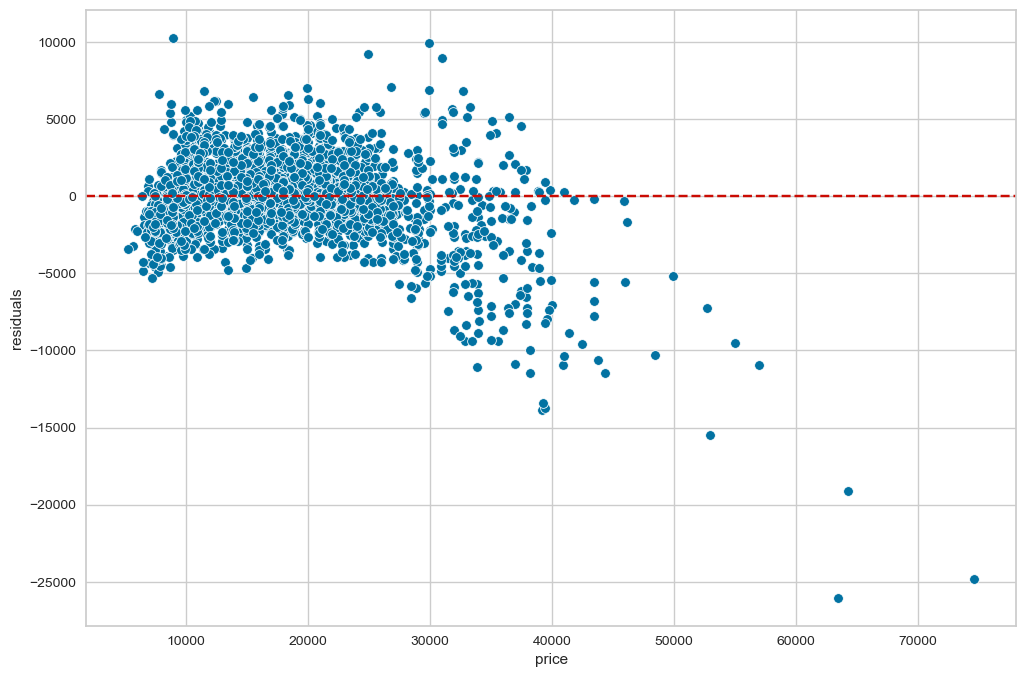

In [57]:
plt.figure(figsize=(12,8))
residuals = y_test - y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()

# When error terms are calculated as negative values, the values on the y-axis of the graph are made positive.
# This makes differences in the magnitudes of error terms more clearly visible.

# Residuals;
# 1- The errors should be approximately equal and randomly distributed on both sides of the axis where the error is 0.
#    Additionally, they should not contain a pattern.
# 2- This distribution should follow a normal distribution.

# If these conditions are met, we can say that the data is suitable for linear regression.


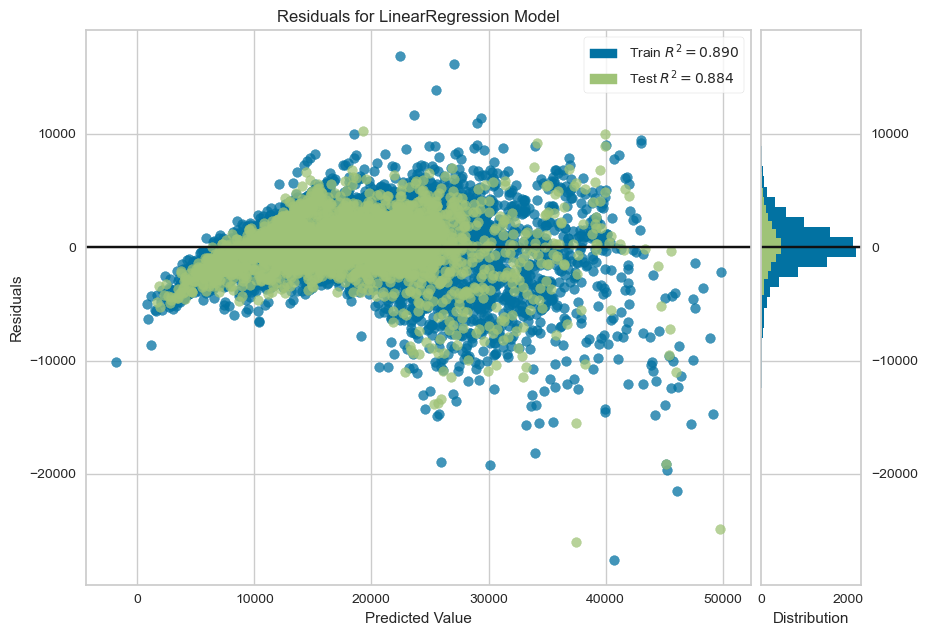

In [58]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        

## Dropping observations from the dataset that worsen my predictions

In [59]:
df1 = df[~(df.price > 35000)]
df1.head()

# To filter rows (observations) where the price is not greater than 35,000,
# The tilde (~) operator is used to get the logical negation of a condition.


,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_VAT deductible,Type_Employee's car,Type_New,Type_Pre-registered,Type_Used,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Part/Full Leather,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_front,Drive_chain_rear
0,15770,56013.000,7.000,3.000,2.000,66.000,1,1422.000,1220.000,3.800,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
1,14500,80000.000,7.000,2.000,1.000,141.000,0,1798.000,1255.000,5.600,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,14640,83450.000,7.000,3.000,1.000,85.000,0,1598.000,1135.000,3.800,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
3,14500,73000.000,6.000,3.000,1.000,66.000,0,1422.000,1195.000,3.800,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0
4,16790,16200.000,7.000,3.000,1.000,66.000,1,1422.000,1135.000,4.100,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0

In [60]:
len(df[df.price>35000])

473

In [61]:
df0[df0.price>35000].groupby("make_model").count().iloc[:,0]

make_model
Audi A1             2
Audi A3            36
Opel Astra          5
Opel Insignia     216
Renault Espace    236
Name: body_type, dtype: int64

In [62]:
df0.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [63]:
X = df1.drop(columns = "price")
y = df1.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [64]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

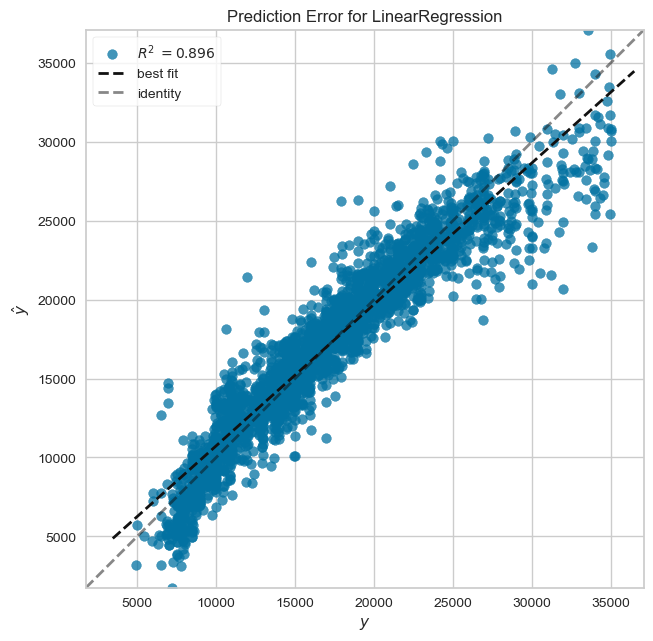

In [65]:
visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [66]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


In [67]:
1894 / df1.price.mean()

# Before removing outliers, our average prediction error was 13.81%. After removing outliers, it dropped to 10.93%.
# This represents an improvement of approximately 2.88% in our predictions.


0.1093750965362424

In [68]:
2501/df.price.mean()

0.13817480842212715

In [69]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [70]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [71]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
5466,24700,26226.735,-1526.735
42,11850,11585.638,264.362
4415,19900,19684.747,215.253
8700,7220,5216.147,2003.853
15626,29490,28328.899,1161.101
5745,15950,17729.313,-1779.313
9651,14490,13448.068,1041.932
8954,7900,4759.010,3140.990
1980,27500,25394.756,2105.244
7036,18350,17833.748,516.252


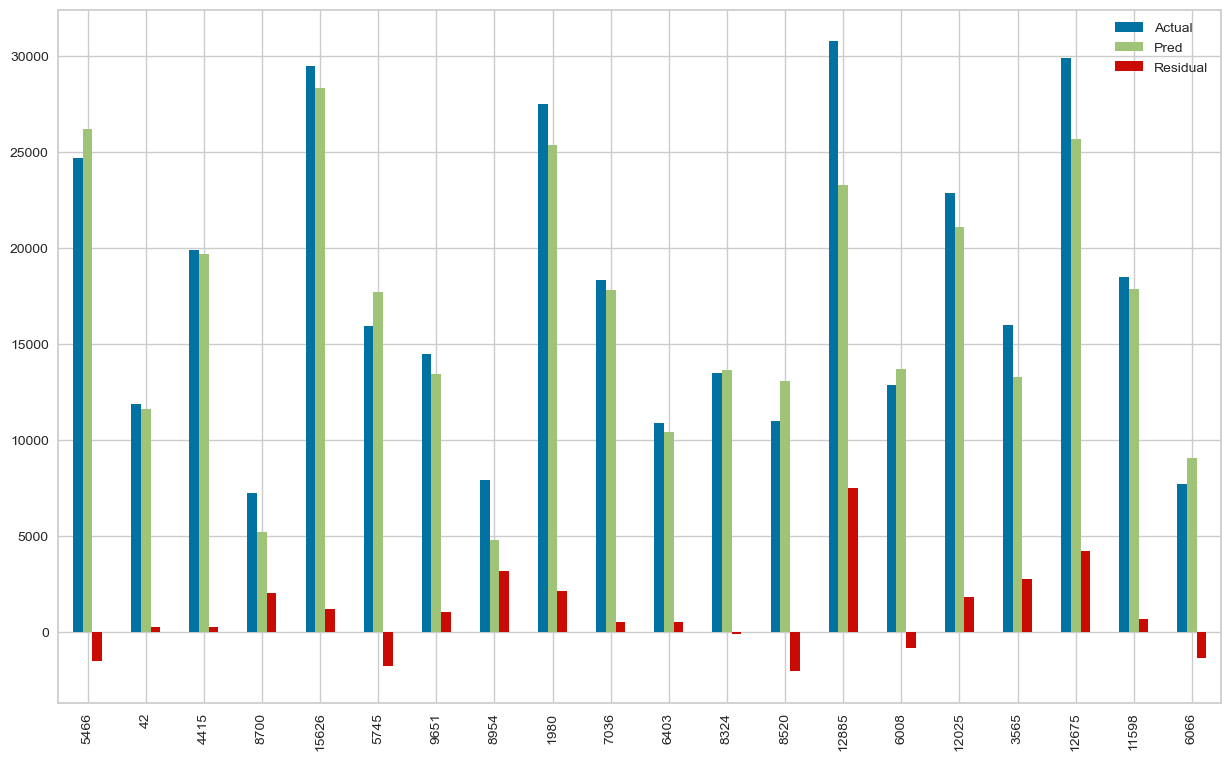

In [72]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

- A positive coefficient indicates that as the input feature increases, the target variable will also increase.

- A negative coefficient indicates that as the input feature increases, the target variable will decrease.

- The larger the absolute value of the coefficient, the greater the effect of the input feature on the target variable.

- If the coefficient is close to zero, it means that the effect of the input feature on the target variable is weak or negligible.

In [73]:
# We will use the coefficients to see the effect of features on predictions and for feature selection.
# The ranking of the coefficients is the same as the feature ranking in the X_train data that we used for training the model.

pd.DataFrame(lm2.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
make_model_Renault Duster,-9447.389
make_model_Renault Clio,-5424.873
make_model_Opel Corsa,-5245.299
make_model_Opel Astra,-3372.469
Drive_chain_rear,-2859.199
Type_Employee's car,-2090.024
Type_Used,-1975.265
ex_Sliding door,-1618.279
Gearing_Type_Manual,-1581.537
age,-1445.872


- A positive coefficient indicates that as the input feature increases, the target variable will also increase.

- A negative coefficient indicates that as the input feature increases, the target variable will decrease.

- The larger the absolute value of the coefficient, the greater the effect of the input feature on the target variable.

- If the coefficient is close to zero, it means the effect of the input feature on the target variable is weak or nonexistent.

## Pipeline

**What is a Pipeline?**

The concept of a pipeline is used to manage data processing and machine learning workflows efficiently and error-free:

A pipeline is a tool that sequences data preprocessing and modeling steps into a single workflow. In the Scikit-learn library, a pipeline combines data transformation processes and a prediction model (estimator).

**Benefits of Using a Pipeline**

1. **Code Readability and Cleanliness**: It enhances code readability and maintenance by consolidating all processing steps into a single structure.

2. **Prevention of Data Leakage**: Especially when data preprocessing steps are performed before model training, it prevents leakage of future data information. The pipeline structure performs these operations separately for each training subset, thus reducing the risk of data leakage.

3. **Ease of Hyperparameter Tuning**: During cross-validation and hyperparameter tuning, you can adjust and manage all the parameters of the steps within the pipeline from a single location.

**Steps to Create and Use a Pipeline**

1. **Define Processing Steps**: First, determine the transformation steps you will perform on your data (e.g., scaling, categorical data transformation).

2. **Create the Pipeline**: Construct a pipeline object that includes your selected processing steps and prediction model.

3. **Train the Pipeline**: Fit the pipeline on the training dataset to train all the transformation steps and the model.

**Summary**

Using a pipeline makes data science and machine learning workflows more efficient and reliable. It ensures that each step is applied in the correct sequence and only on training data, preventing data leakage and enhancing the model's generalization ability. It also simplifies model selection and parameter tuning, reducing errors.

In [74]:
operations = [("scaler", MinMaxScaler()), ("linear", LinearRegression())]

# Here, we define the steps to scale the data using `MinMaxScaler` and to model it using `LinearRegression`.
# Each step is a tuple in the form of (name, transformer/estimator).


In [75]:
pipe_model = Pipeline(steps=operations)

# We are creating a pipeline with the steps we defined.


In [76]:
pipe_model.fit(X_train, y_train)
 
# We use the fit method to train both the data transformation steps and the model. 
# This first scales our data using MinMaxScaler and then trains the LinearRegression model on the scaled data.


Pipeline(steps=[('scaler', MinMaxScaler()), ('linear', LinearRegression())])

In [77]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.898,0.896
mae,1414.209,1415.381
mse,3792751.061,3840225.852
rmse,1947.499,1959.649


# Implement Ridge Regression

**Why and When to Use Ridge-Lasso**

Ridge and Lasso regressions are regularization versions of linear regression. This regularization helps make the model more robust against overfitting and can sometimes improve the overall performance of the model.

1. **Preventing Overfitting**:
   - **Ridge (L2 Regularization)**: Adds a penalty equal to the sum of the squares of the coefficients to shrink them. This reduces the model's complexity and helps prevent overfitting.
   - **Lasso (L1 Regularization)**: Adds a penalty equal to the sum of the absolute values of the coefficients to push them towards zero. This performs feature engineering by completely zeroing out some coefficients, reducing the model's complexity.

2. **Feature Selection**:
   - Lasso regression can remove ineffective features from the model by completely reducing some coefficients to zero. This is known as feature selection and is very useful in high-dimensional datasets.

3. **Multicollinearity**:
   - If there is high correlation (multicollinearity) between features in a dataset, it can destabilize the coefficients of linear regression. Ridge and Lasso can stabilize coefficients in such situations.

4. **Model Interpretability**:
   - Lasso can increase model interpretability by including only the most important features in the model. Ridge, by shrinking coefficients, also makes the impact of features in the model more understandable.

- In summary, Ridge and Lasso regressions help overcome some limitations of linear regression and enable the creation of more generalized and stable models.

- The choice of which method to use depends on the dataset, problem definition, and particularly on how flexible you want the model to be.

- Approaches like **Elastic Net** are also available to balance between these two regularization techniques.


**L2 Regularization (Ridge Regularization)**

**Purpose:** Prevent model complexity and overfitting.

**Method:** Shrinks the weights by penalizing the sum of the squares of the model coefficients.

**Result:** Coefficients approach zero but do not become zero. All variables in the model are retained.

**Use Case:** Preferred when we want to include each feature in the model.

**Penalty:** Adds the sum of the squares of the coefficients, scaled by λ (lambda - regularization parameter), to the model's cost function.

**L1 Regularization (Lasso Regularization)**

**Purpose:** Both prevent overfitting and perform feature selection.

**Method:** Shrinks some weights to zero by penalizing the sum of the absolute values of the model coefficients.

**Result:** Coefficients of insignificant features are zeroed out, thereby performing automatic feature selection.

**Use Case:** Preferred when we believe only a few features are effective in the model.

**Penalty:** Adds the sum of the absolute values of the coefficients, scaled by λ, to the model's cost function.

- Both regularization methods use the λ parameter; the larger the value, the stronger the regularization and the more the model weights are shrunk.

- However, L2 retains all features in the model, while L1 selects only the most important features and eliminates others.

- Therefore, while L1 regularization is considered a useful tool for feature selection, L2 is more focused on reducing overfitting.

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [78]:
# In the ridge regression algorithm, the data used for training must be scaled. This process handles the multicollinearity issue 
# by applying equal weighting to all features by the model and can also group features into important and less important categories.

# Why are we using MinMax scaling? 
# Because we have features scaled between 0 and 1 using get_dummies.

scaler = MinMaxScaler()
scaler.fit(X_train)  # To avoid data leakage, we fit only on the training dataset

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Scaling the target variable is not necessary for linear regression because the target variable is not used in the calculation of coefficients.**

## Model

In [79]:
from sklearn.linear_model import Ridge

In [80]:
ridge_model = Ridge(alpha=1, random_state=42)  # default alpha=1; alpha is the regularization strength

# alpha is a regularization hyperparameter. As this value increases, the strength of the regularization applied increases. 
# To combat overfitting, this hyperparameter should be increased.


In [81]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [82]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1413.716,1412.912
mse,3794938.109,3829231.926
rmse,1948.060,1956.842


## Finding best alpha for Ridge

**Purpose of GridSearchCV**

- **Hyperparameter Optimization**: GridSearchCV is used to find the best combinations of hyperparameters to maximize the performance of a machine learning model.

- **Exhaustive Search**: When there are multiple hyperparameters, GridSearchCV tries all possible combinations of these hyperparameters to find the combination that provides the best result.

**Hyperparameters vs. Parameters**

- **Hyperparameter**: These are parameters set before the model training that control the learning process and structure of the model. For example, the tree depth in a tree-based model or the regularization value in a linear model.

- **Parameter**: These are values learned and extracted from the dataset during the model training process. For example, coefficients and intercepts in a linear regression model.

**How GridSearchCV Works**

1. **Define the Parameter Grid**: A list of various hyperparameters and the values to be tested for these parameters (parameter grid) is created by the user.

2. **Search and Evaluation**: GridSearchCV trains the model for each combination in the parameter grid and evaluates the model’s performance using cross-validation for each combination.

3. **Find the Best Combination**: Among all combinations, the hyperparameter combination that maximizes the model’s performance is selected.

4. **Train the Final Model**: The final model is trained with the selected best hyperparameters. Therefore, the model resulting from GridSearchCV is trained with these optimal hyperparameters.

**Summary**

GridSearchCV is a hyperparameter optimization tool used to maximize the performance of a machine learning model. It systematically tries all possible hyperparameter combinations to determine the one that provides the best result and trains the final model with this combination. This process is crucial for ensuring that the model makes more effective and accurate predictions.

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

# **`alpha_space`**: The GridSearchCV algorithm first requires a range of values for the hyperparameter (HP) of interest. For this, we define the range of values to be provided to GridSearchCV. (We are providing 100 different values evenly spaced between 0.01 and 100.)

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

These representations are a form of numerical expression known as scientific notation. Scientific notation is used to represent very large or very small numbers and specifies how a number is expressed in terms of powers of 10.

- **9.899e+01:** This expression means that the number 9.899 is multiplied by 10 raised to the power of +01 (which is 1). So, \( 9.899 \times 10^1 = 98.99 \).

- **1.000e+02:** This expression means that the number 1.000 is multiplied by 10 raised to the power of +02 (which is 2). So, \( 1.000 \times 10^2 = 100.00 \).

Such representations are commonly used in scientific work, engineering, and some programming languages. They are especially useful for presenting floating-point numbers in a more readable form in computer program outputs.

In [85]:
ridge_model = Ridge(random_state=42) 

# GridSearchCV also requires the machine learning algorithm that we will use.

In [86]:
param_grid = {"alpha":alpha_space}

# We define the hyperparameter spaces in a dictionary using the names of the hyperparameters (HP) used in the ML algorithm.
# We define the space as a list or array corresponding to each HP. 
# Note that the variable `alpha_space` defined for `alpha` is an array with 100 elements.


In [87]:
ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

# For the Ridge ML model, we specify the metric by which we want to improve the model's scores under `scoring`.
# We can use only one metric. The default value is R2 score.

# GridSearchCV will evaluate scores for all values in the hyperparameter space separately, according to the metric we specify, 
# using different regions of the data (as specified by the cv number) and calculate the average. 
# It returns the hyperparameter values that yield the highest average.

# The default cv number is 5.

# Since GridSearchCV also performs Cross Validation, we specify `return_train_score=True` to obtain validation and train set scores.
# (The metric score written under `scoring` is returned only.)


In [88]:
ridge_grid_model.fit(X_train_scaled,y_train) 

# Since we set cv=10, training is performed on 10 different subsets of the data for each alpha value.


GridSearchCV(cv=10, estimator=Ridge(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [89]:
ridge_grid_model.best_params_

# After training, it found the best value to be 1.02.


{'alpha': 1.02}

In [90]:
ridge_grid_model.best_estimator_

# It returns only the hyperparameters that differ from the default. If the best alpha value after grid search had been 1,
# it would not show the value 1 here.

# arr = np.linspace(0.01, 100, 100)
# print(1.02 in arr)


Ridge(alpha=1.02, random_state=42)

In [91]:
pd.DataFrame(ridge_grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.060,0.005,0.003,0.003,0.010,{'alpha': 0.01},-1978.044,-1937.280,-1904.261,-1955.055,-1906.690,-2060.461,-2055.468,-1998.684,-2069.129,-1949.457,-1981.453,59.107,2
1,0.050,0.002,0.003,0.002,1.020,{'alpha': 1.02},-1972.226,-1938.831,-1906.079,-1958.467,-1906.059,-2058.752,-2056.446,-1998.056,-2066.640,-1947.015,-1980.857,58.403,1
2,0.054,0.004,0.003,0.001,2.030,{'alpha': 2.03},-1969.822,-1941.251,-1908.777,-1961.840,-1906.768,-2059.557,-2058.102,-1998.319,-2065.378,-1946.208,-1981.602,57.915,3
3,0.051,0.004,0.003,0.002,3.040,{'alpha': 3.04},-1969.348,-1944.208,-1911.925,-1965.138,-1908.255,-2061.121,-2060.132,-1999.156,-2064.876,-1946.351,-1983.051,57.453,4
4,0.051,0.003,0.003,0.002,4.050,{'alpha': 4.05},-1970.051,-1947.502,-1915.303,-1968.368,-1910.222,-2063.062,-2062.377,-2000.381,-2064.899,-1947.097,-1984.926,57.003,5
5,0.053,0.004,0.002,0.001,5.060,{'alpha': 5.06},-1971.508,-1951.005,-1918.792,-1971.537,-1912.497,-2065.218,-2064.748,-2001.877,-2065.300,-1948.246,-1987.073,56.564,6
6,0.054,0.004,0.005,0.004,6.070,{'alpha': 6.07},-1973.465,-1954.635,-1922.322,-1974.651,-1914.972,-2067.500,-2067.190,-2003.566,-2065.985,-1949.677,-1989.396,56.137,7
7,0.059,0.008,0.005,0.002,7.080,{'alpha': 7.08},-1975.759,-1958.335,-1925.853,-1977.713,-1917.577,-2069.857,-2069.668,-2005.395,-2066.885,-1951.311,-1991.835,55.724,8
8,0.054,0.006,0.003,0.002,8.090,{'alpha': 8.09},-1978.283,-1962.068,-1929.359,-1980.728,-1920.267,-2072.254,-2072.162,-2007.325,-2067.952,-1953.094,-1994.349,55.326,9
9,0.052,0.003,0.004,0.003,9.100,{'alpha': 9.1},-1980.964,-1965.807,-1932.826,-1983.697,-1923.009,-2074.667,-2074.658,-2009.329,-2069.150,-1954.989,-1996.910,54.941,10


In [92]:
ridge_grid_model.best_index_

# Returns the index of the dataframe where the best score was obtained.


1

In [93]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1413.712,1412.875
mse,3795015.419,3829086.131
rmse,1948.080,1956.805


In [94]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [95]:
ridge = Ridge(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

# 'GridSearchCV' object has no attribute 'coef_'
# Since grid search models do not have the coef_ attribute, we manually reconstruct and train the model 
# with the best hyperparameters found by grid search to obtain the coefficients.


,Coef
km,-11101.861
make_model_Renault Duster,-8384.639
make_model_Renault Clio,-5409.447
make_model_Opel Corsa,-5295.138
age,-4382.308
make_model_Opel Astra,-3334.959
Displacement_cc,-2271.755
Type_Employee's car,-2076.174
Type_Used,-1967.430
Drive_chain_rear,-1817.244


# Implement Lasso Regression

## Model

In [96]:
from sklearn.linear_model import Lasso

In [97]:
lasso_model = Lasso(random_state=42, alpha=1)

# The Lasso model also requires the data to be scaled. This process equalizes the weighting of all features by the model,
# which helps resolve multicollinearity issues and allows for feature selection.


In [98]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [99]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.170,1409.010
mse,3806483.613,3814782.540
rmse,1951.021,1953.147


## Finding best alpha for Lasso

In [100]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [101]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [102]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [103]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [104]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [105]:
lasso = Lasso(alpha=1.02, random_state=42).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-11128.712
make_model_Renault Duster,-7501.018
make_model_Renault Clio,-5364.928
make_model_Opel Corsa,-5287.867
age,-4382.958
make_model_Opel Astra,-3332.248
Type_Employee's car,-1985.696
Displacement_cc,-1960.999
Type_Used,-1890.448
Gearing_Type_Manual,-1619.269


# Implement Elastic-Net

**Elastic-Net**

Elastic-Net is a combination of Ridge and Lasso regularization techniques.

It has two separate regularization parameters to balance between Ridge Regression and Lasso. When the hyperparameter `l1_ratio` is set to 1, it behaves like Lasso, and when set to 0, it behaves like Ridge. Typically, Elastic-Net leans towards Lasso.

**When to Use Elastic-Net:**

Elastic-Net is particularly useful when many features are highly correlated with each other and some features need to be completely excluded. It provides a balance between feature selection and managing high correlations among features.

**Advantages of Elastic-Net:**

1. **Feature Selection and Regularization**: Elastic-Net combines the feature selection capability of Lasso with the regularization applied to model coefficients by Ridge. This makes it useful when you want to perform feature selection while also regularizing coefficients.

2. **Multicollinearity**: In datasets with highly correlated features, Lasso might randomly select one feature from a group. Elastic-Net can mitigate this issue by selecting groups of correlated features together.

3. **High-Dimensional Data**: In situations where the number of features exceeds the number of observations, Elastic-Net retains the benefits of Lasso while also providing the stability of Ridge.


- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## Model

In [106]:
from sklearn.linear_model import ElasticNet

In [107]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train_scaled,y_train)

ElasticNet(random_state=42)

In [108]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.584,0.592
mae,3099.732,3053.445
mse,15472875.539,15016869.532
rmse,3933.558,3875.161


## Finding best alpha and l1_ratio for ElasticNet

In [109]:
elastic_model = ElasticNet(random_state=42)

In [110]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

**alpha**:
   - This parameter controls the overall strength of regularization.
   - When `alpha` is 0, ElasticNet applies no regularization.
   - As the value of `alpha` increases, the strength of the regularization increases, which can help make the model more resistant to overfitting.

**l1_ratio**:
   - This parameter controls the mix between L1 (Lasso) and L2 (Ridge) regularization.
   - When `l1_ratio` is 1, it means pure L1 regularization (i.e., Lasso only).
   - When `l1_ratio` is 0, it means pure L2 regularization (i.e., Ridge only).
   - When `0 < l1_ratio < 1`, you get a combination of both L1 and L2 regularization.
   - For example, an `l1_ratio` of 0.5 indicates that L1 and L2 regularization are used equally.

In [111]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=42), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [112]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [113]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.898,0.896
mae,1414.186,1408.956
mse,3806891.515,3814773.360
rmse,1951.126,1953.144


In [114]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Feature Importance

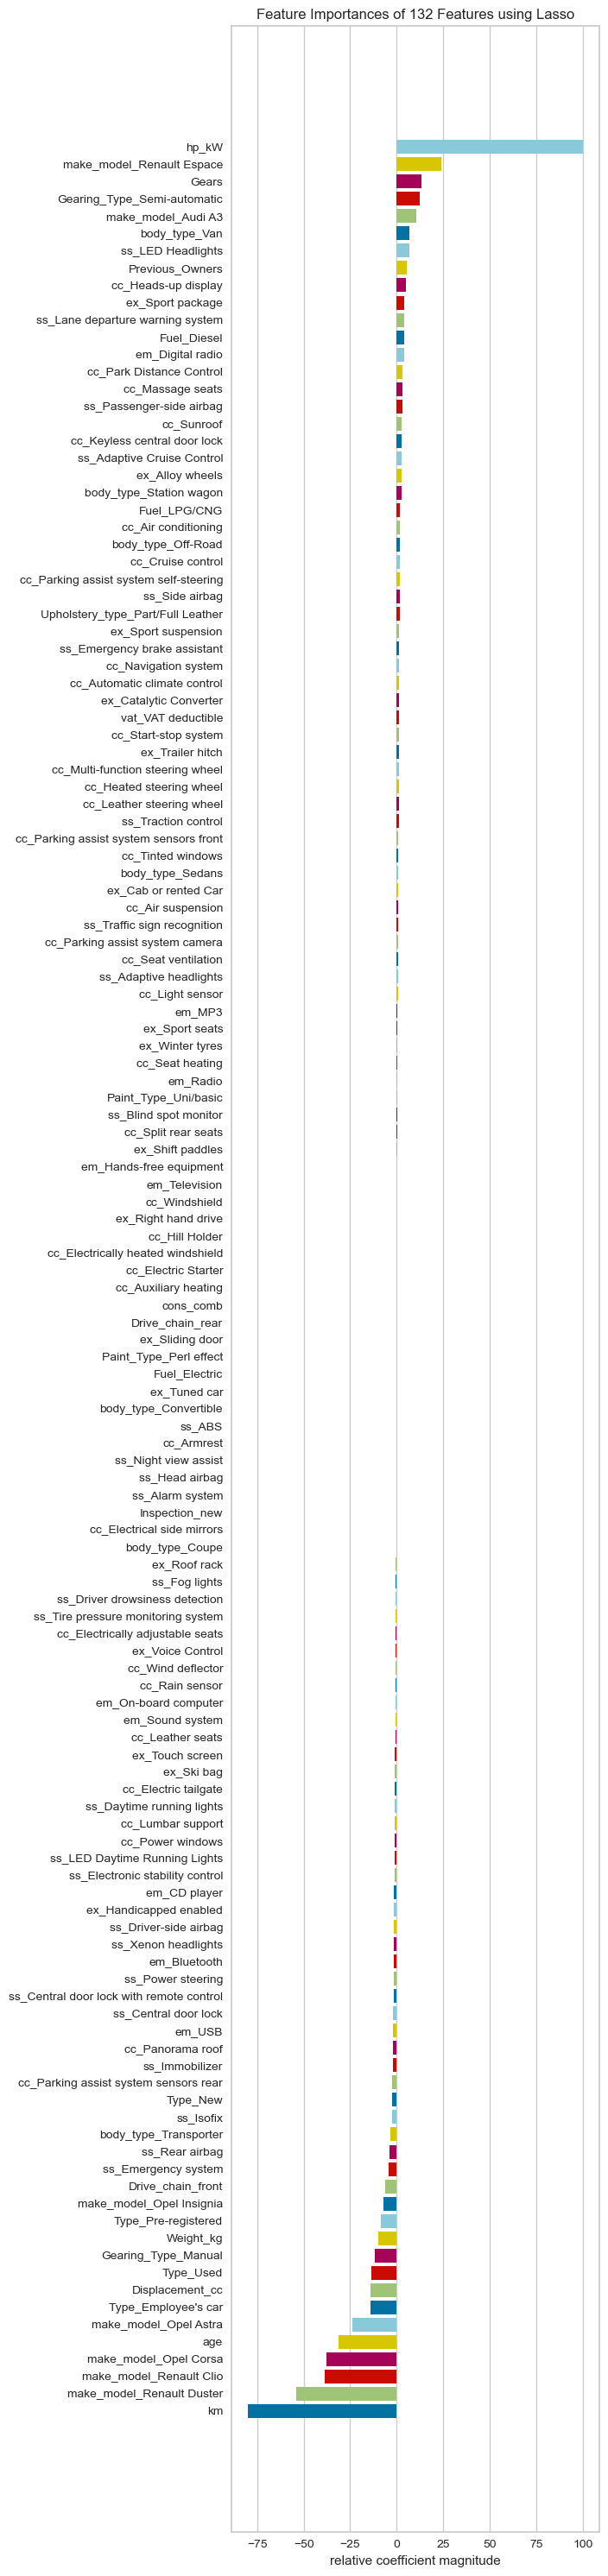

<Axes: title={'center': 'Feature Importances of 132 Features using Lasso'}, xlabel='relative coefficient magnitude'>

In [115]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(Lasso(alpha=1.02), labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

# Remember that we need to use the Lasso model because we are performing feature selection.


In [116]:
df_new = df0[["make_model", "hp_kW", "km", "age", "Gearing_Type", "price"]]

# We select the top 5 features that have the most impact on predictions.
# You might wonder why the "make_model" feature is selected. From the visual analysis above,
# we observed that "make_model" is among the features with the most influence on predictions,
# with unique categorical observations (e.g., Audi A3, Audi A1, Renault Espace, etc.). Therefore, we included "make_model" in the selection.


In [117]:
df_new.head()

,make_model,hp_kW,km,age,Gearing_Type,price
0,Audi A1,66.000,56013.000,3.000,Automatic,15770
1,Audi A1,141.000,80000.000,2.000,Automatic,14500
2,Audi A1,85.000,83450.000,3.000,Automatic,14640
3,Audi A1,66.000,73000.000,3.000,Automatic,14500
4,Audi A1,66.000,16200.000,3.000,Automatic,16790


In [118]:
# We repeat the operations we performed earlier.

df_new[df_new["make_model"] == "Audi A2"]


,make_model,hp_kW,km,age,Gearing_Type,price
2614,Audi A2,85.000,26166.000,1.000,Manual,28200


In [119]:
df_new.drop(index=[2614], inplace=True)

In [120]:
df_new = df_new[~(df_new.price > 35000)]

In [121]:
df_new = pd.get_dummies(df_new)
df_new.head()

,hp_kW,km,age,price,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,15770,True,False,False,False,False,False,False,False,True,False,False
1,141.000,80000.000,2.000,14500,True,False,False,False,False,False,False,False,True,False,False
2,85.000,83450.000,3.000,14640,True,False,False,False,False,False,False,False,True,False,False
3,66.000,73000.000,3.000,14500,True,False,False,False,False,False,False,False,True,False,False
4,66.000,16200.000,3.000,16790,True,False,False,False,False,False,False,False,True,False,False


In [122]:
len(df_new)

15419

In [123]:
# We determine X and y according to our new dataset with 6 features and reconfigure the model.

X = df_new.drop(columns=["price"])
y = df_new.price


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [125]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha': alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                                 param_grid=param_grid,
                                 scoring='neg_root_mean_squared_error',
                                 cv=10,
                                 n_jobs=-1)

In [127]:
lasso_final_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [128]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [129]:
lasso_final_model.best_score_

-2239.588352950935

In [130]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.867,0.877
mae,1611.742,1553.998
mse,5007030.903,4547724.302
rmse,2237.640,2132.539


In [131]:
2132 / df_new.price.mean()

0.1233209499596912

In [132]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compare Models Performance

In [133]:
# We assign the metrics obtained from all models to the `scores` variable. 
# Then, to ensure that model names appear in the index and metrics appear in the columns,
# we transpose the DataFrame.

scores = {
    "linear_m": {
        "r2_score": lm_R2,
        "mae": lm_mae,
        "rmse": lm_rmse
    },
    "ridge_m": {
        "r2_score": rm_R2,
        "mae": rm_mae,
        "rmse": rm_rmse
    },
    "lasso_m": {
        "r2_score": lasm_R2,
        "mae": lasm_mae,
        "rmse": lasm_rmse
    },
    "elastic_m": {
        "r2_score": em_R2,
        "mae": em_mae,
        "rmse": em_rmse
    },
    "final_m": {
        "r2_score": fm_R2,
        "mae": fm_mae,
        "rmse": fm_rmse
    }
}
scores = pd.DataFrame(scores).T
scores


,r2_score,mae,rmse
linear_m,0.896,1415.381,1959.649
ridge_m,0.896,1412.875,1956.805
lasso_m,0.896,1408.956,1953.144
elastic_m,0.896,1408.956,1953.144
final_m,0.877,1553.998,2132.539


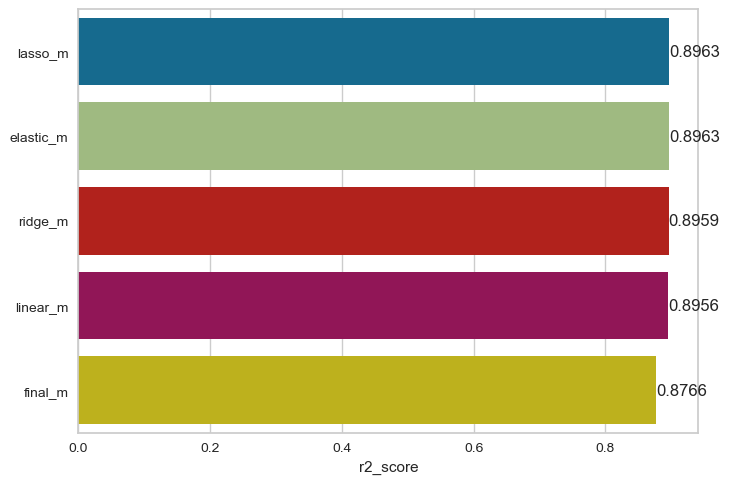

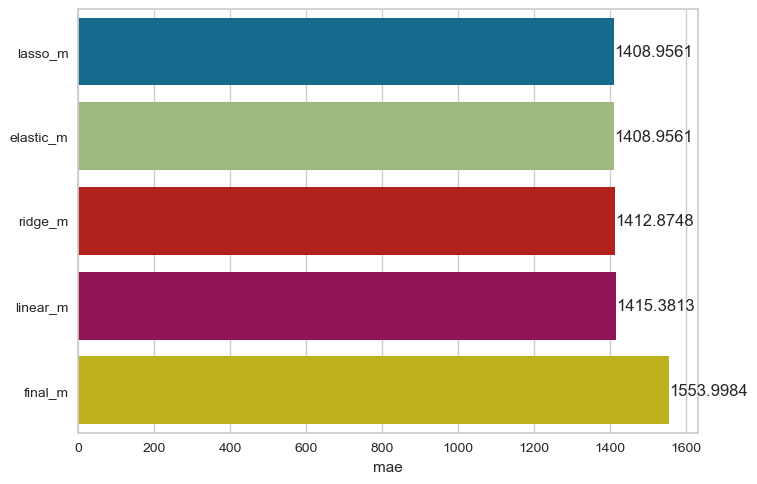

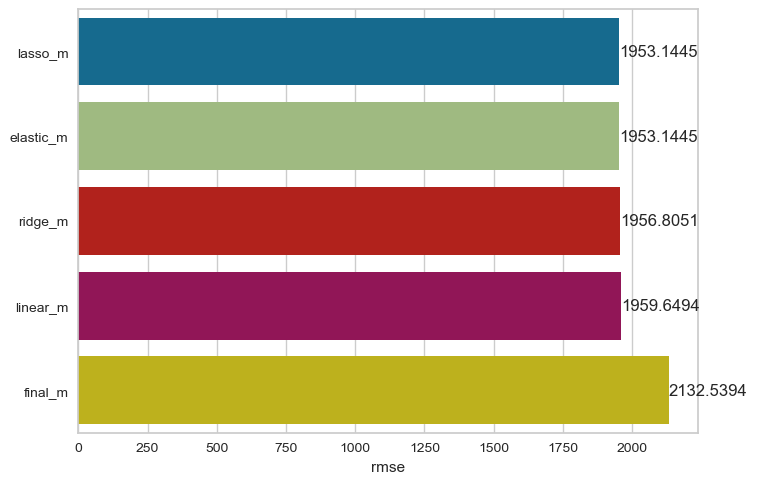

In [134]:
# metrics = scores.columns

for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False  # If the metric is r2_score, the bar plot will be sorted in descending order
    else:
        ascending = True   # If the metric is mae or rmse, the bar plot will be sorted in ascending order
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x=compare[j], y=compare.index)
    for p in ax.patches:
        width = p.get_width()  # Get the length of the bar
        ax.text(width,         # Set the text 1 unit to the right of the bar
                p.get_y() + p.get_height() / 2,  # Y coordinate + X coordinate / 2
                '{:.4f}'.format(width),  # Display the variable with 4 decimal places
                ha='left',               # Horizontal alignment
                va='center')            # Vertical alignment


# Prediction

## Prediction with new observation

In [135]:
# In the final step, remember that we did not make a train-test split

final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)


In [136]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [137]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [138]:
final_model.best_estimator_

Lasso(alpha=0.01)

In [139]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [140]:
my_dict = pd.DataFrame([my_dict])
my_dict

,hp_kW,age,km,make_model,Gearing_Type
0,66,2,17000,Audi A3,Automatic


In [141]:
my_dict = pd.get_dummies(my_dict)
my_dict

,hp_kW,age,km,make_model_Audi A3,Gearing_Type_Automatic
0,66,2,17000,True,True


In [142]:
X.head(1)

# The feature order of the observation we will predict must be the same as the feature order of the training data.


,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66.000,56013.000,3.000,True,False,False,False,False,False,False,False,True,False,False


In [143]:
my_dict = my_dict.reindex(columns=X.columns, fill_value=0)
my_dict

,hp_kW,km,age,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,66,17000,2,0,True,0,0,0,0,0,0,True,0,0


In [144]:
my_dict = final_scaler.transform(my_dict)
my_dict

array([[0.13065327, 0.05362776, 0.66666667, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        ]])

In [145]:
final_model.predict(my_dict)

array([19559.29001107])

## Prediction with random samples

In [146]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [147]:
lasso_model = Lasso()

param_grid = {'alpha': alpha_space}

final_model = GridSearchCV(estimator=lasso_model,
                           param_grid=param_grid,
                           scoring='neg_root_mean_squared_error',
                           cv=10,
                           n_jobs=-1)

In [148]:
final_model.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [149]:
final_model.best_estimator_

Lasso(alpha=0.01)

**Lasso(alpha=0.01)**

**alpha** controls the strength of regularization in Lasso regression. Regularization is used to reduce the model's tendency to overfit.

- If the value of `alpha` is close to 0 (e.g., 0.01), Lasso regularization is minimal, and the model behaves more like a linear regression model.
- If `alpha` is larger, Lasso regularization increases, resulting in more feature coefficients being set to zero, which simplifies the model.

In summary, it means that the model provides some protection against overfitting while still allowing most features to be used.


In [150]:
random_samples = df_new.sample(n=20)

In [151]:
X_random = random_samples.drop(columns=["price"])

In [152]:
X_random = final_scaler.transform(X_random)

In [153]:
predictions = final_model.predict(X_random)
predictions

array([20683.02302073, 18694.09636601, 11832.71794221, 12195.54328076,
       16112.62754782,  9883.14439947, 23995.6845107 , 10709.54386778,
        8419.30516572, 20553.75231383, 13550.90139427, 11968.69475598,
       23573.43272406, 22197.41104737, 23235.58368303, 26058.20389756,
       13449.5033112 , 18447.16477591, 18181.85727818, 18230.13571127])

In [154]:
true_labels = random_samples["price"].values
true_labels

array([20444, 15689, 11999, 12880, 17800,  8880, 26980, 12770, 10750,
       20900, 10990, 10300, 24500, 18200, 23950, 33235,  9750, 17980,
       17600, 16448], dtype=int64)

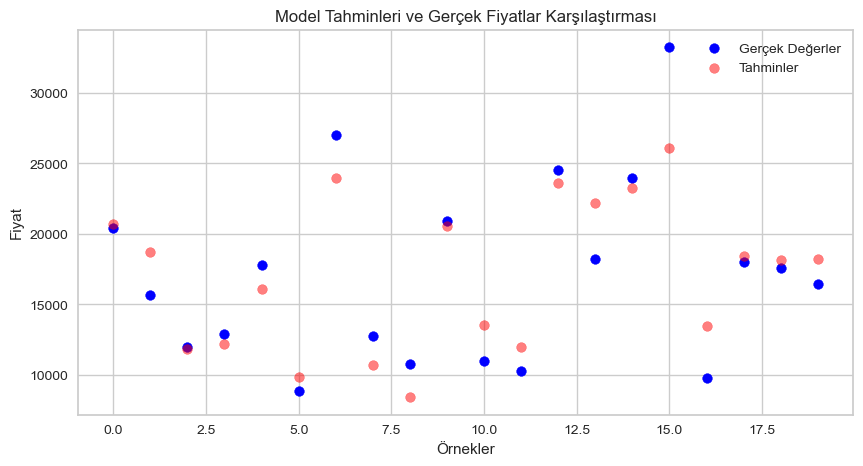

In [155]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(true_labels)), true_labels, color='blue', label='Gerçek Değerler')
plt.scatter(range(len(predictions)), predictions, color='red', label='Tahminler', alpha=0.5)
plt.title('Model Tahminleri ve Gerçek Fiyatlar Karşılaştırması')
plt.xlabel('Örnekler')
plt.ylabel('Fiyat')
plt.legend()
plt.show()

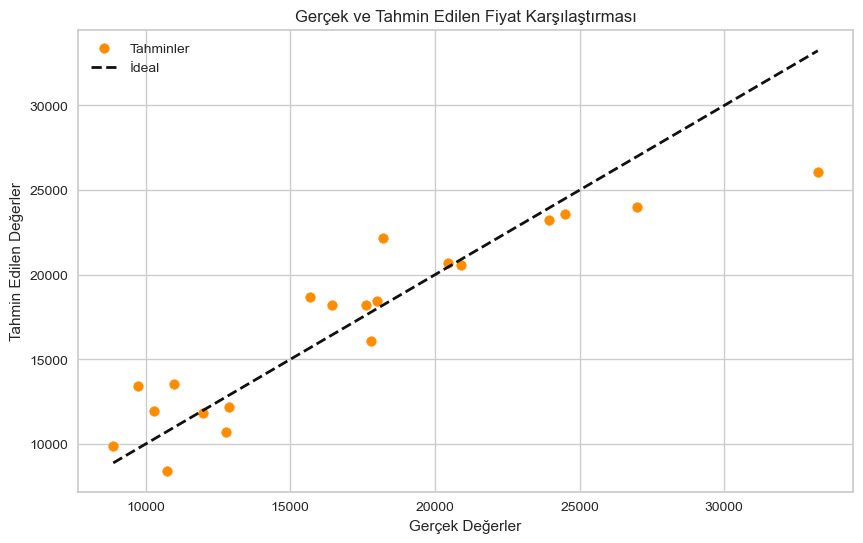

In [156]:
plt.figure(figsize=(10, 6))
plt.scatter(true_labels, predictions, color='darkorange', label='Tahminler')
plt.plot([min(true_labels), max(true_labels)], [min(true_labels), max(true_labels)], 'k--', lw=2, label='İdeal')
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Gerçek ve Tahmin Edilen Fiyat Karşılaştırması')
plt.legend()
plt.show()